In [1]:
# importing warning library:
import warnings
warnings.filterwarnings('ignore')

Using warnings.filterwarnings('ignore') is a way to silence warnings globally for the rest of the program's runtime. This approach can be helpful in situations where you are aware of certain warnings in your code, but you prefer not to see them during execution, especially in cases where the warnings are not critical and you don't need to take any immediate action.

In [2]:
#importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
'''using the pd.set_option() function from pandas to set the maximum number of columns to be displayed 
in the output when you print a pandas DataFrame.
By calling pd.set_option('display.max_columns', 10), you are setting the maximum number of columns 
to be displayed to 10.'''
pd.set_option('display.max_columns', None) #None means we haven't put the restrictions yet.

# Importing and Cleaning Data:

In [3]:
df = pd.read_csv('application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
df.shape

(307511, 122)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
# percent of data null in each column:
pd.set_option('display.max_rows',200)
print(df.isnull().mean()*100)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

columns which are having null values more than 47% could give us wrong insights and hence its better to drop them.

#### droping columns with values greater than 47%:


In [8]:
null_percentages = df.isnull().mean() * 100

# Identify columns where the percentage of null values is greater than 47%
columns_to_remove = null_percentages[null_percentages > 47].index
df.drop(columns=columns_to_remove, inplace=True)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [9]:
print(df.isnull().mean()*100)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### imputing the missing values:

OCCUPATION_TYPE column has 31% missing values, since it's a categorical column, imputing a missing value with a unknown or other values.

In [10]:
for index, item in enumerate(df['OCCUPATION_TYPE']):
    if pd.isnull(item):
        df['OCCUPATION_TYPE'][index] = 'others'

In [11]:
df['OCCUPATION_TYPE'].value_counts(normalize = True)*100

others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [12]:
df['OCCUPATION_TYPE'].isnull().mean()*100

0.0

#### EXT_SOURCE_3 has 19% missing value.

- since EXT_SOURCE_3 has numerical values hence we could tackle NaN with the median values

In [13]:
df['EXT_SOURCE_3'].median()

0.5352762504724826

In [14]:
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median() , inplace=True)

In [15]:
df['EXT_SOURCE_3'].isnull().mean()*100

0.0

In [16]:
df['EXT_SOURCE_3'].value_counts(normalize = True)*100

0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: EXT_SOURCE_3, Length: 814, dtype: float64

#### Now handling the columns with missing values about 13%

Below are the columns which has missing values about 13%:
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

In [17]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [18]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [19]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [20]:
df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [21]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [22]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [23]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [24]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

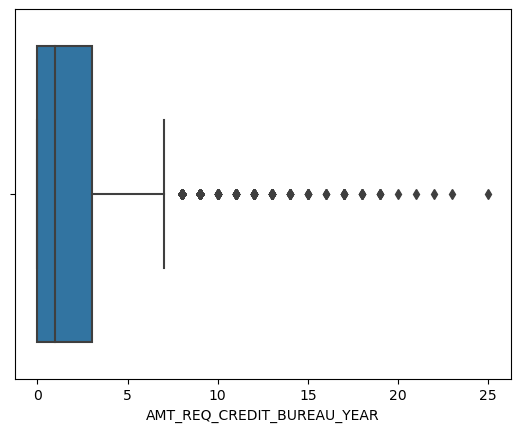

In [25]:
sns.boxplot(x=df['AMT_REQ_CREDIT_BUREAU_YEAR'])

# Show the plot
plt.show()

### Conclusion:
- for the column ['AMT_REQ_CREDIT_BUREAU_YEAR'] we will go with imputing the missing values using median as median are more robust to outliers.
- whereas for the other columns it was found that majority of the rows are having value as 0. and hence we impute the column with mode.

In [26]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']
for col in cols:
    mode_value = df[col].mode().values[0]  # Get the mode value for the column
    df[col].fillna(mode_value, inplace=True)  # Fill NaN values with the mode value
print(df.isnull().mean()*100)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [27]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace = True)

In [28]:
print(df.isnull().mean()*100)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


#### Handling Missing values less than 1%:

In [29]:
df['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [30]:
df['EXT_SOURCE_2'].value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [31]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [32]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

0.0     88.526216
1.0      9.242716
2.0      1.736761
3.0      0.388920
4.0      0.082548
5.0      0.018271
6.0      0.003589
7.0      0.000326
34.0     0.000326
8.0      0.000326
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### Conclusion:
- for categorical columns impute the missing values with mode
- for numerical columns imputing the missing values with median.

In [33]:
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0],inplace = True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(),inplace= True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace= True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace= True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace= True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace= True)

In [34]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(),inplace= True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(),inplace= True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0],inplace = True)

In [35]:
df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median(),inplace = True)

In [36]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

#### Converting negative values in positive in days columns:

In [37]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'] * (-1)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] * (-1)
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'] * (-1)
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'] * (-1)
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * (-1)

In [38]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801        9461   
1       House / apartment                    0.003541       16765   
2       House / apartment                    0.010032       19046   
3       House / apartment                    0.008019       19005   
4       House / apartment                    0.028663       19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561        9327   
307507  House / apartment       

### Binning of Continous Columns.
#### Standardizing Days column in years for easy binning.

In [39]:
df['Years_Birth'] = (df['DAYS_BIRTH'] / 365).astype(int)

In [40]:
df['Years_ID_PUBLISH'] = (df['DAYS_ID_PUBLISH'] / 365).astype(int)
df['Years_EMPLOYED'] = (df['DAYS_EMPLOYED'] / 365).astype(int)
df['Years_REGISTRATION'] = (df['DAYS_REGISTRATION'] / 365).astype(int)
df['Years_LAST_PHONE_CHANGE'] = (df['DAYS_LAST_PHONE_CHANGE'] / 365).astype(int)

### Binning AMT_CREDIT column:

In [41]:
df['AMT_CREDIT_Category'] = pd.cut(df['AMT_CREDIT'],[0,200000,400000,600000,800000,1000000,1200000],
                         labels = ["very low credit",'low credit','median credit','high credit','very high credit','extremely high credit'])

In [42]:
df['AMT_CREDIT_Category'].value_counts(normalize = True)*100

low credit               29.018566
median credit            23.697310
high credit              15.462789
very low credit          12.924635
very high credit         10.984724
extremely high credit     7.911976
Name: AMT_CREDIT_Category, dtype: float64

In [43]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

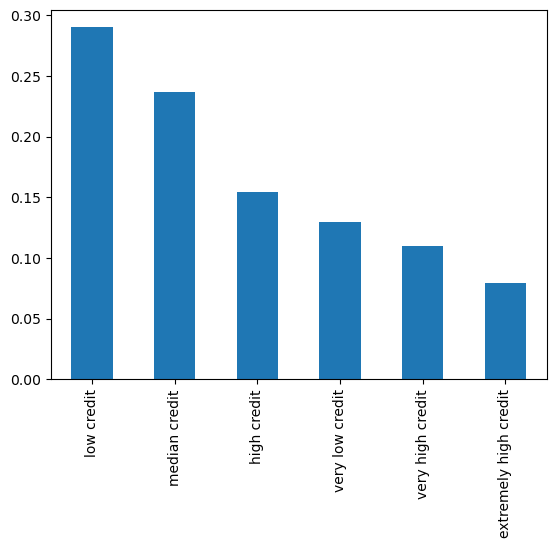

In [44]:
df['AMT_CREDIT_Category'].value_counts(normalize = True).plot.bar()
plt.show()

### Binning years_birth column:

In [45]:
df['Age_category'] = pd.cut(df['Years_Birth'], [0,25,45,65,85] ,
                            labels = ['below 25','25 to 45','45 to 65','65 to 85'])

In [46]:
df['Age_category'].value_counts(normalize = True)*100

25 to 45    51.901233
45 to 65    41.163406
below 25     5.306477
65 to 85     1.628885
Name: Age_category, dtype: float64

<Axes: ylabel='Age_category'>

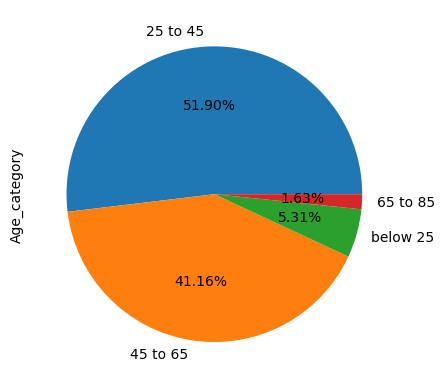

In [47]:
df['Age_category'].value_counts(normalize = True).plot.pie(autopct = '%1.2f%%')

- autopct='%1.2f%%': This is the autopct parameter used with the plot.pie() function. It formats the percentage labels that are displayed on each slice of the pie chart.

- %1.2f: This specifies the format for the percentage value. 1.2f means that the percentage will be shown with two decimal places.
- %%: The double percent sign is used to display the percentage symbol % after the percentage value.

- Conclusion : Most of the applicants are between 25 to 45 age groups.

## Data Imbalance Check

In [48]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [49]:
df['TARGET'].value_counts(normalize = True)*100 

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Dividing TARGET column into two (for getting 0 and 1 rows separately)

In [50]:
tar0 = df[df['TARGET'] == 0]
tar1 = df[df['TARGET'] == 1]

In [51]:
# Lets see which all columns are categorical and which of them are numerical in our dataset.
cat_col = list(df.select_dtypes(include=[object, 'category']).columns)
num_col = list(df.select_dtypes(include=[int, float]).columns)

In [52]:
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AMT_CREDIT_Category',
 'Age_category']

In [53]:
num_col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


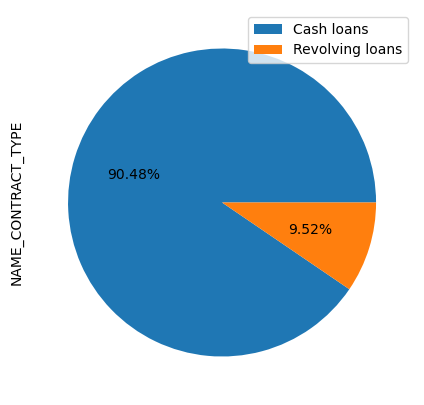

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


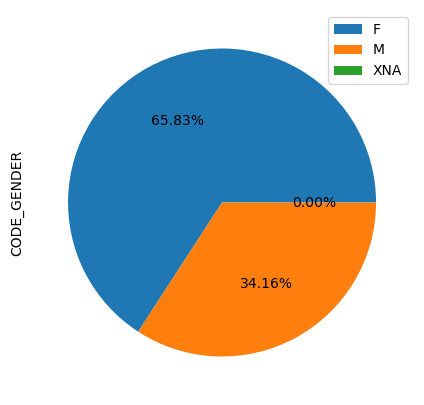

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


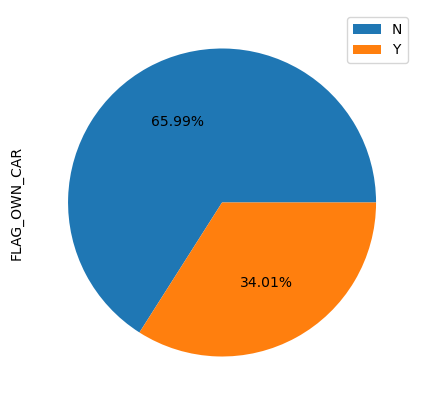

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


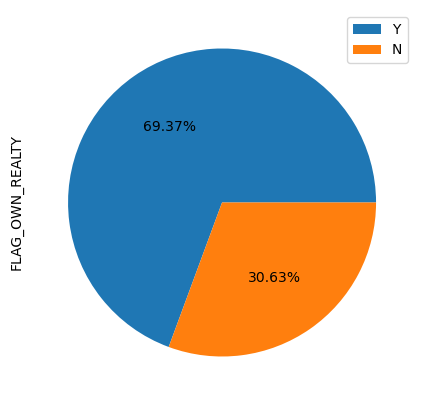

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


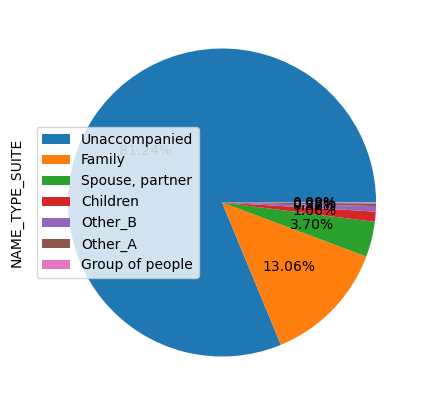

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


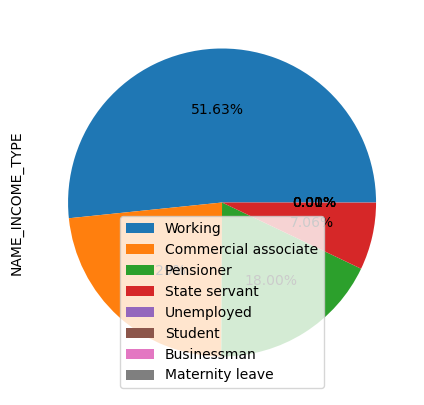

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


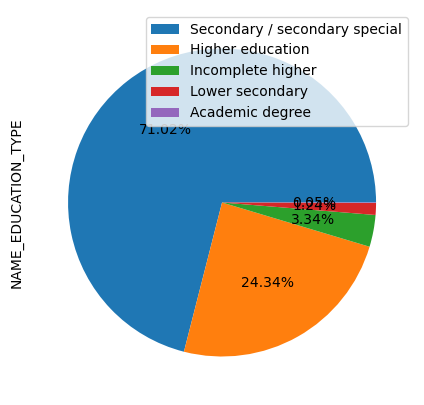

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


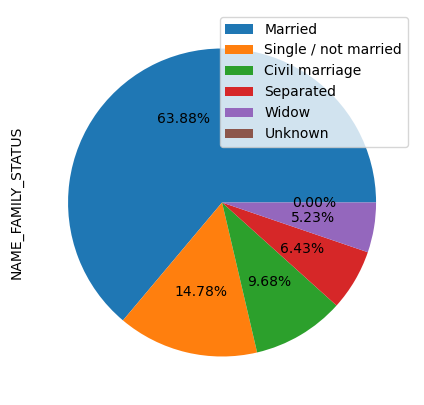

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


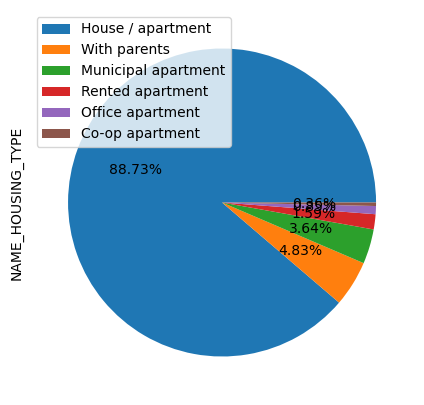

others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


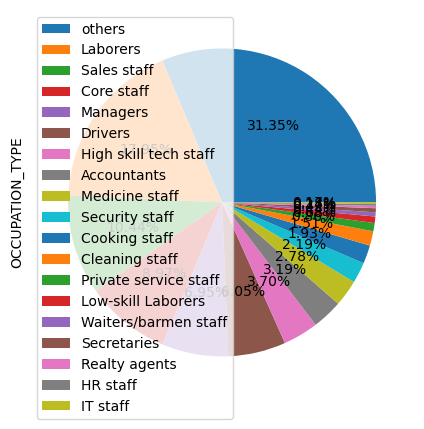

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


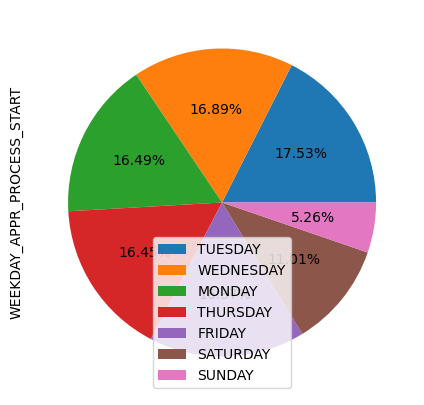

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

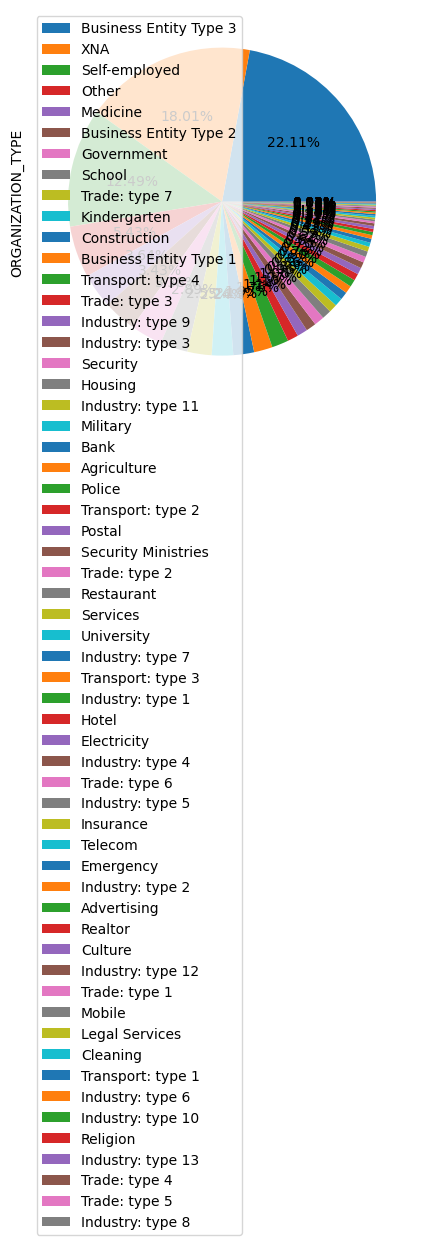

low credit               0.290186
median credit            0.236973
high credit              0.154628
very low credit          0.129246
very high credit         0.109847
extremely high credit    0.079120
Name: AMT_CREDIT_Category, dtype: float64


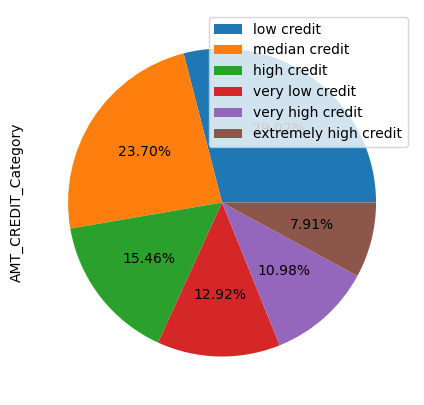

25 to 45    0.519012
45 to 65    0.411634
below 25    0.053065
65 to 85    0.016289
Name: Age_category, dtype: float64


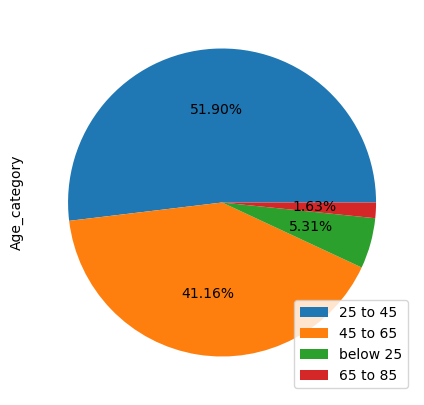

In [54]:
for col in cat_col:
    print(df[col].value_counts(normalize = True))
    plt.figure(figsize=[5,5])
    df[col].value_counts(normalize = True).plot.pie(labeldistance = None,autopct = '%1.2f%%')
    plt.legend()
    plt.show()

Conclusion: 
- NAME_CONTRACT_TYPE: More applications have cash loans than revolving loans.
- CODE_GENDER: Number of female applicants are twice that of male applicants.
- FLAG_OWN_CAR: Most(70%) of the applicants do not own car.
- FLAG_OWN_REALTY: Most(70%) of the applicants do not own house.
- NAME_TYPE_SUITE: Most(81%) of the applicants are unaccompanied.
- NAME_INCOME_TYPE: Most(51%) of the applicants are earning from their work.
- NAME_EDUCATION_TYPE: 71% of the applicants have completed Secondary/secondary special education.
- NAME_FAMILY_STATUS: 63% of the applicants are married.
- NAME_HOUSING_TYPE: 88% of the housing type of applicants are house/appartments.
- OCCUPATION_TYPE: Most(31%) of the applicants have other occupation type.
- WEEKDAY_APPR_PROCESS_START: Most of the applicants have applied for the loan on Tuesday.
- ORGANIZATION_TYPE: Most of the organization type of the employees are Business Entity Type 3.

### Plot on numerical columns:
#### Categorizing columns with and without flags:

In [55]:
num_col_withoutflag = []
num_col_withflag = []
for col in num_col:
    if col.startswith('FLAG'):
        num_col_withflag.append(col)
    else:
        num_col_withoutflag.append(col)

In [56]:
num_col_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [57]:
num_col_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Years_Birth',
 'Years_ID_PUBLISH',
 'Years_EMPLOYED',
 'Years_REGISTRATION',
 'Years_LAST_PHONE_CHANGE']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


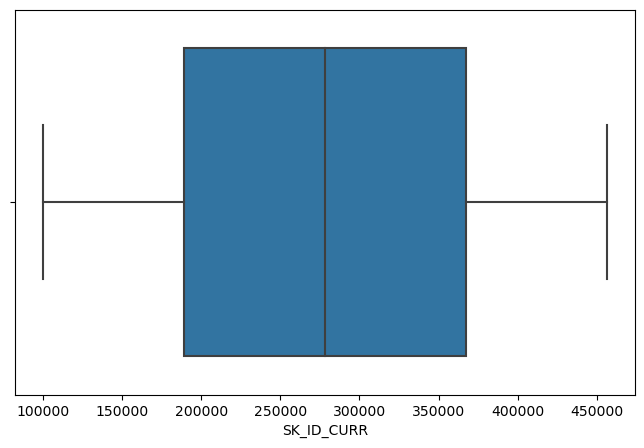

---------------------------------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


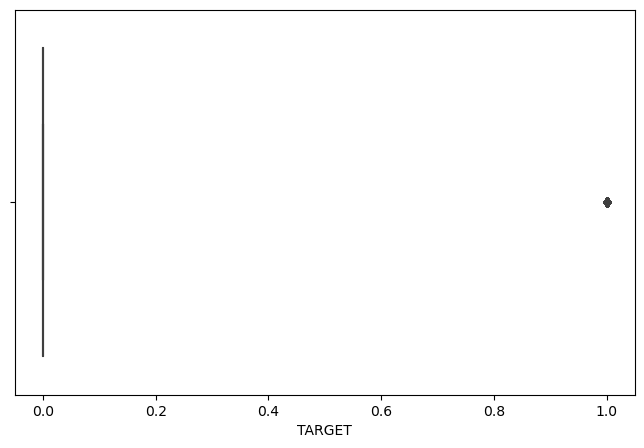

---------------------------------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


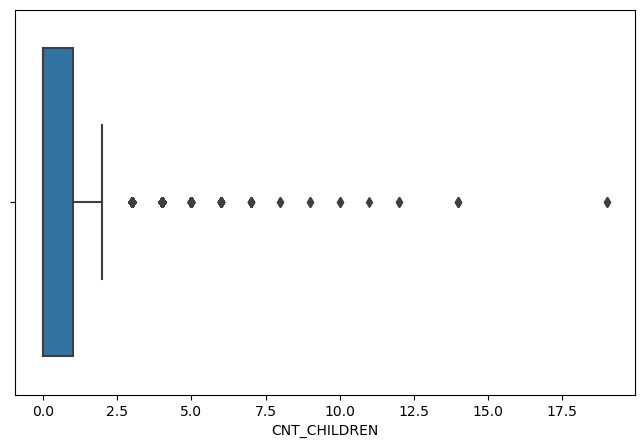

---------------------------------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


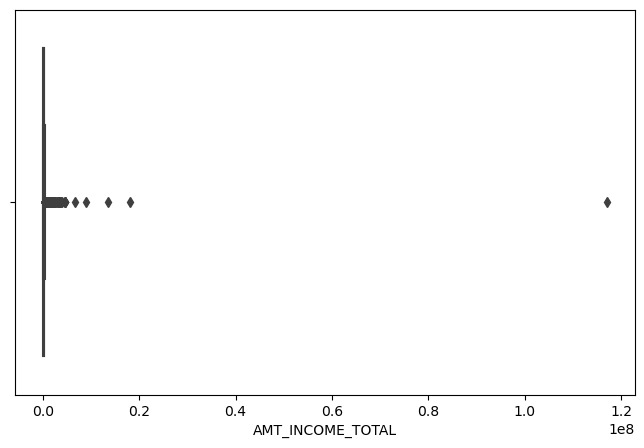

---------------------------------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


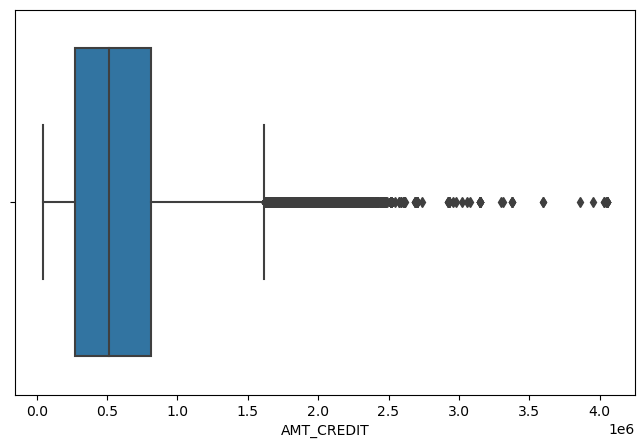

---------------------------------------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


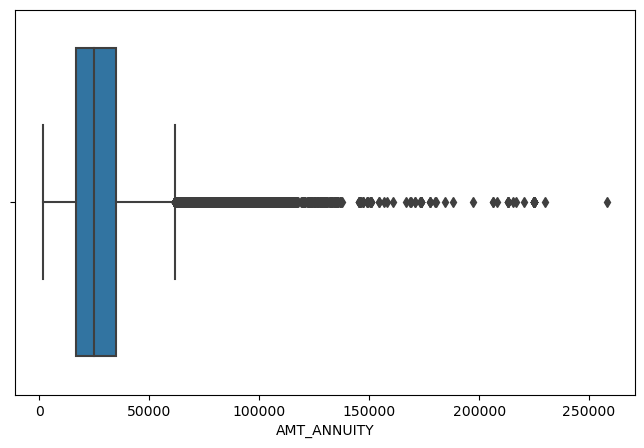

---------------------------------------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


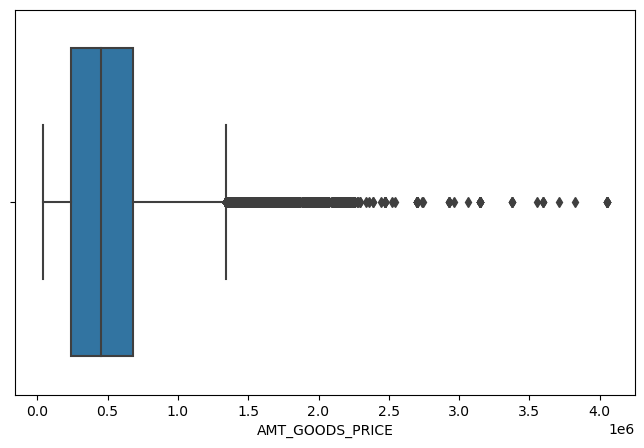

---------------------------------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


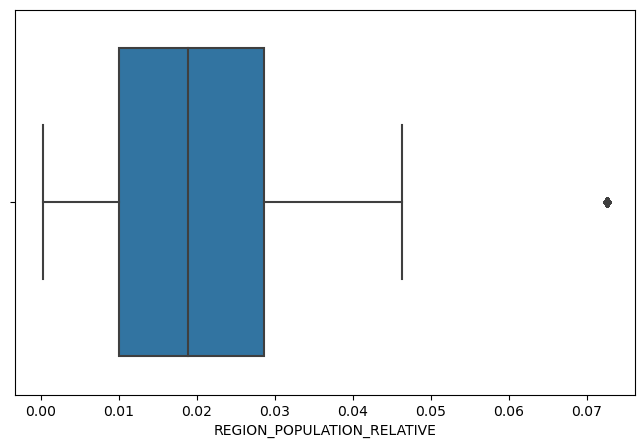

---------------------------------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


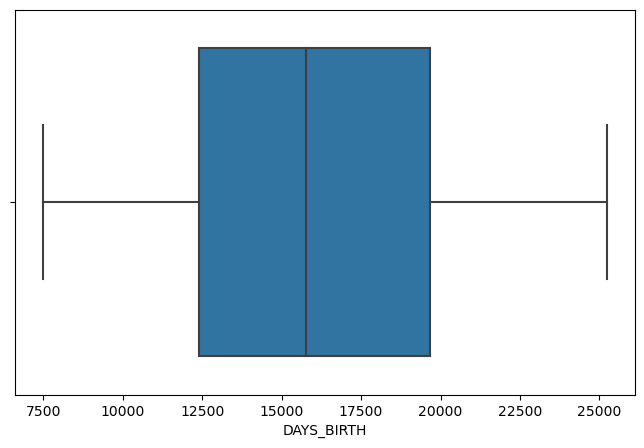

---------------------------------------------
count    307511.000000
mean     -63815.045904
std      141275.766519
min     -365243.000000
25%         289.000000
50%        1213.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64


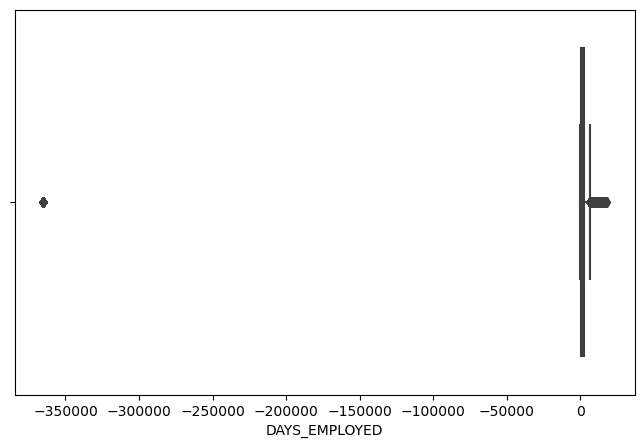

---------------------------------------------
count    307511.000000
mean       4986.120328
std        3522.886321
min          -0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


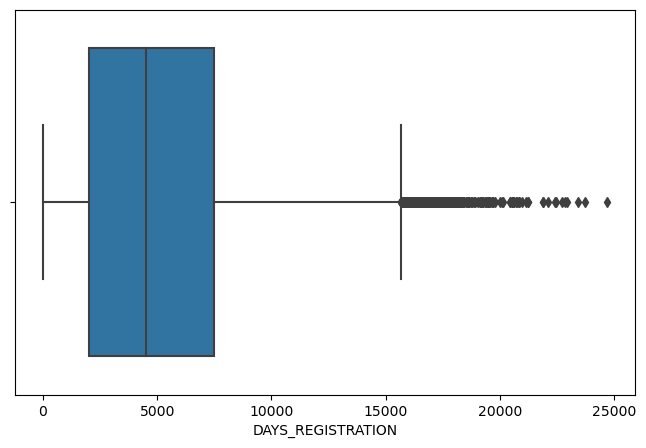

---------------------------------------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


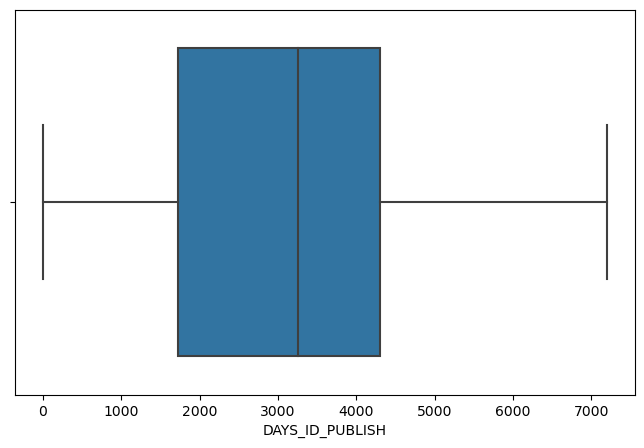

---------------------------------------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


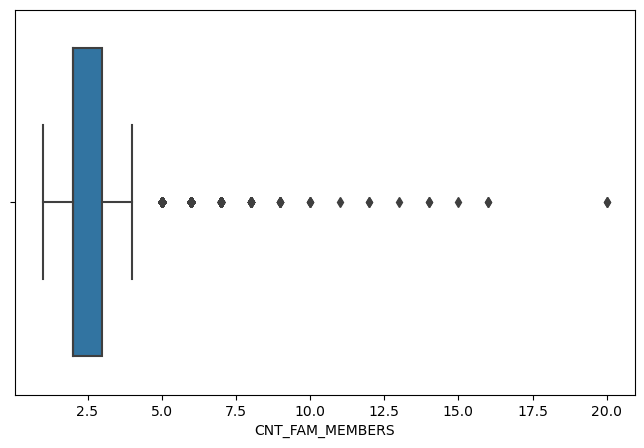

---------------------------------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


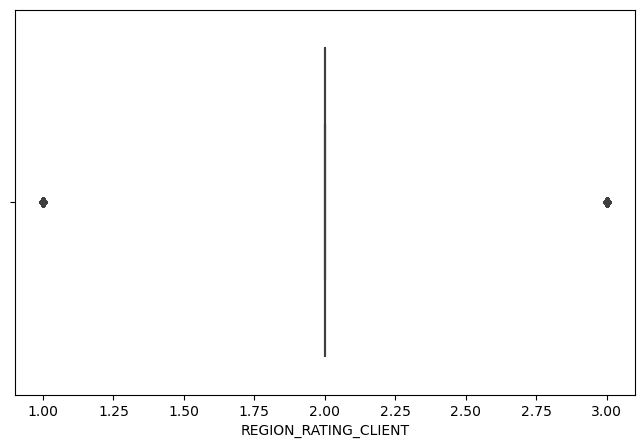

---------------------------------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


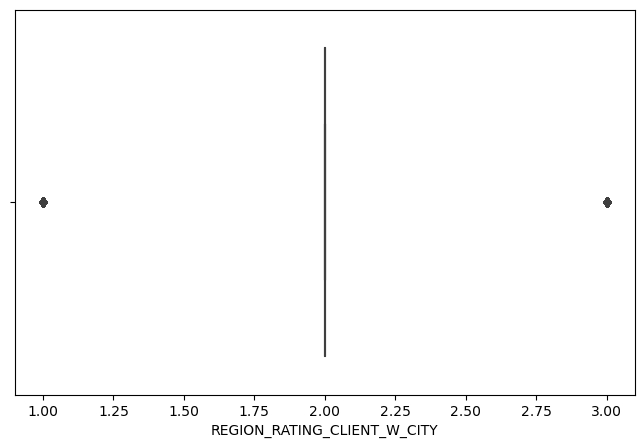

---------------------------------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


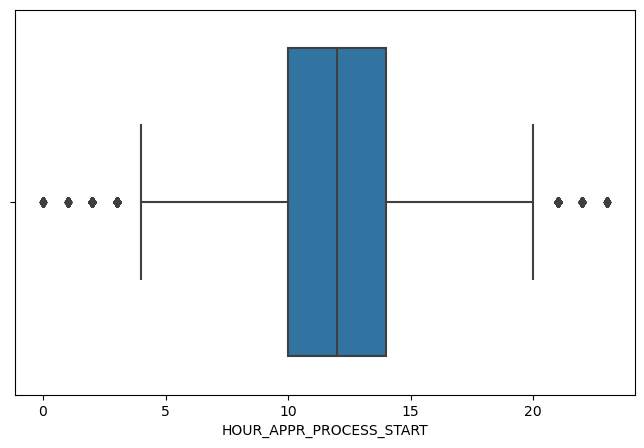

---------------------------------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


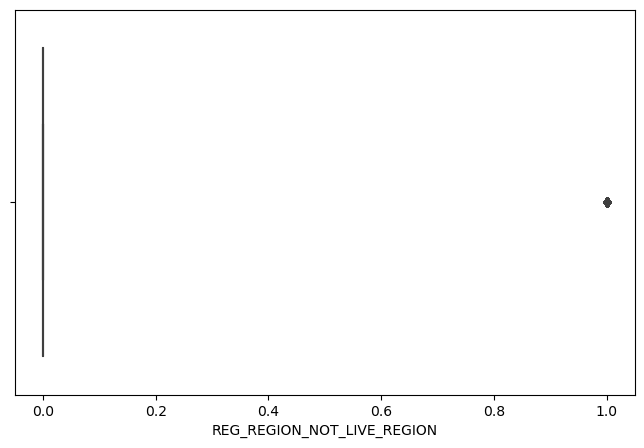

---------------------------------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


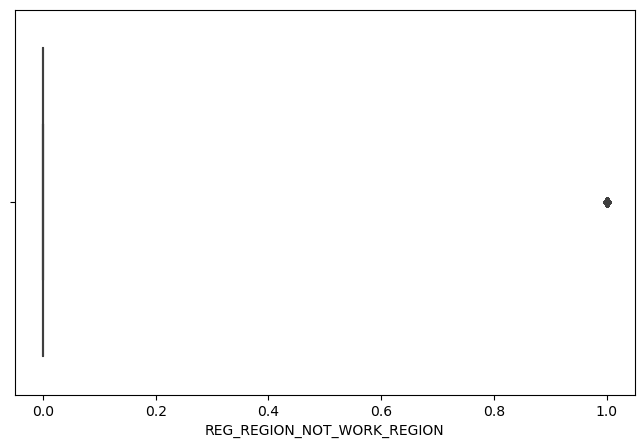

---------------------------------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


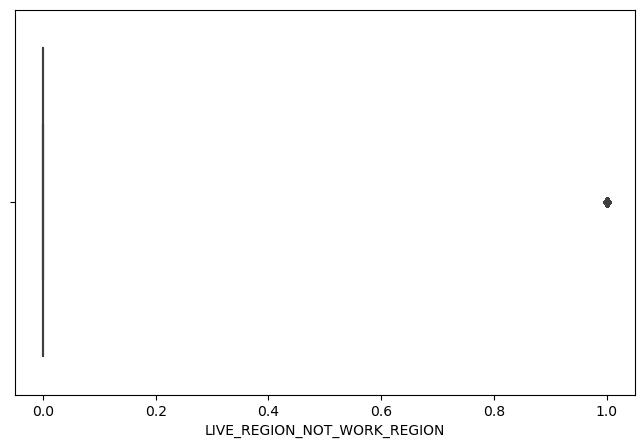

---------------------------------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


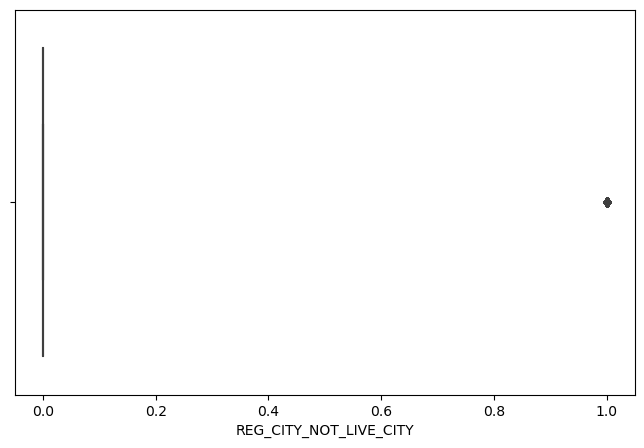

---------------------------------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


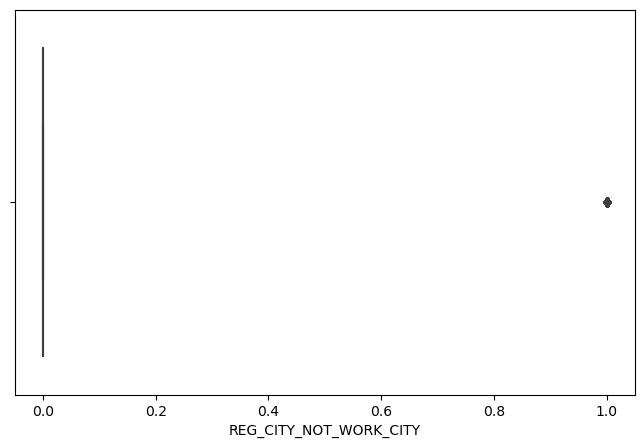

---------------------------------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


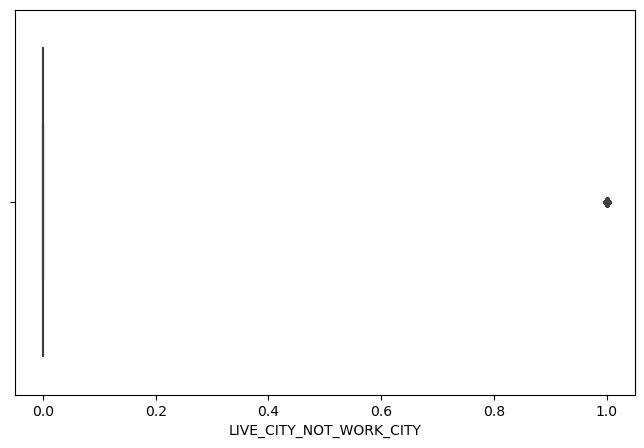

---------------------------------------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


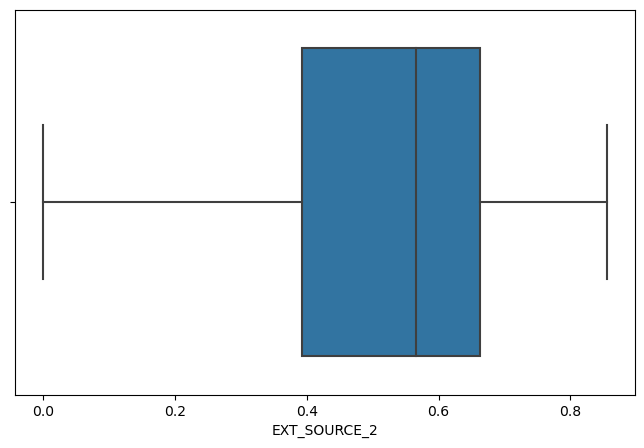

---------------------------------------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


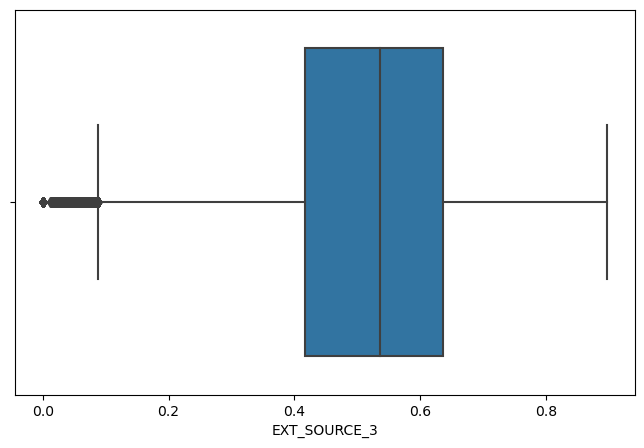

---------------------------------------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


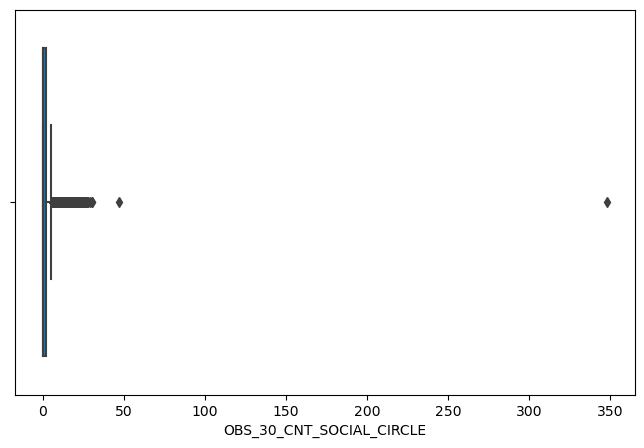

---------------------------------------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


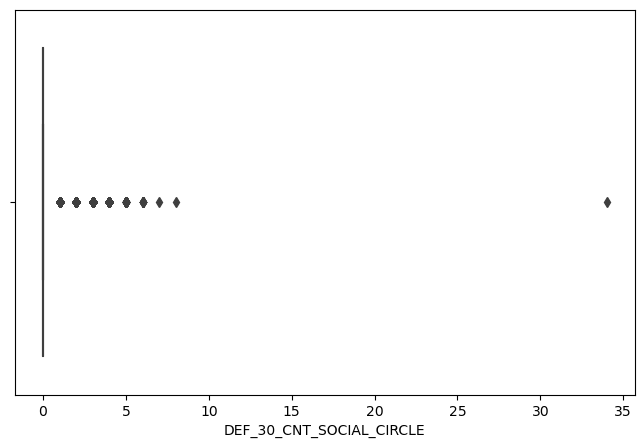

---------------------------------------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


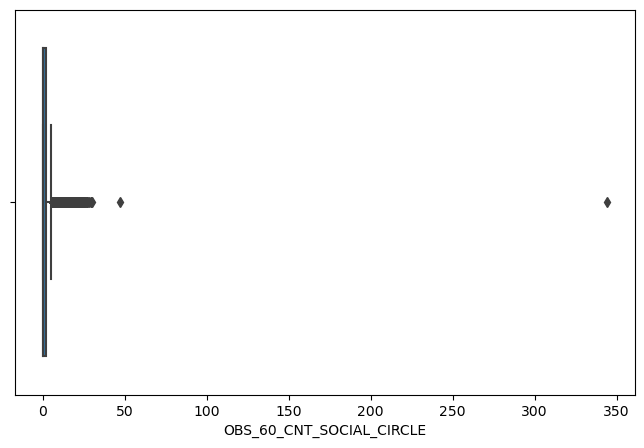

---------------------------------------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


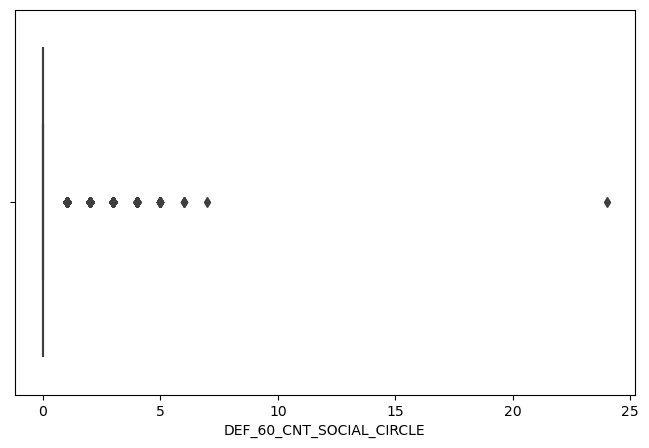

---------------------------------------------
count    307511.000000
mean        962.858119
std         826.807226
min          -0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


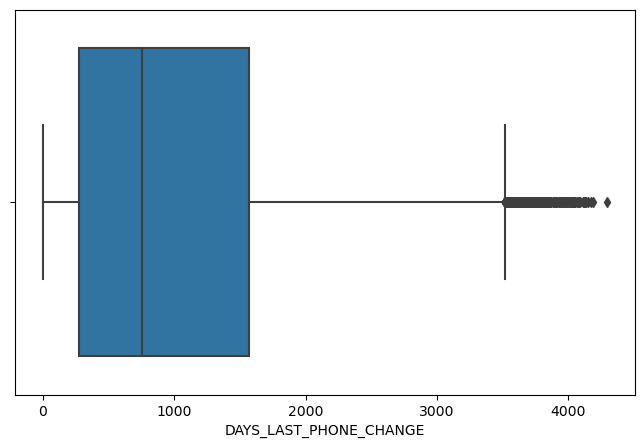

---------------------------------------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


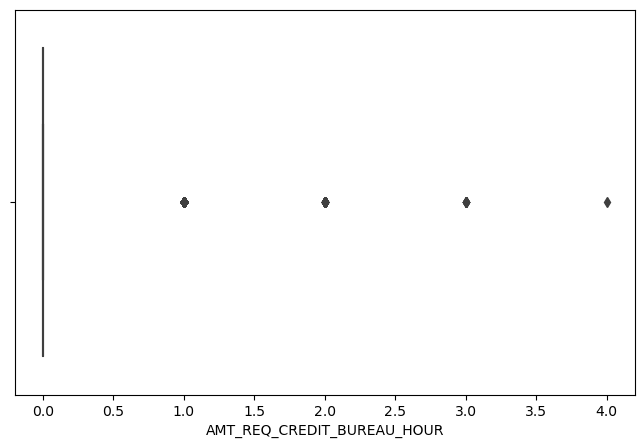

---------------------------------------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


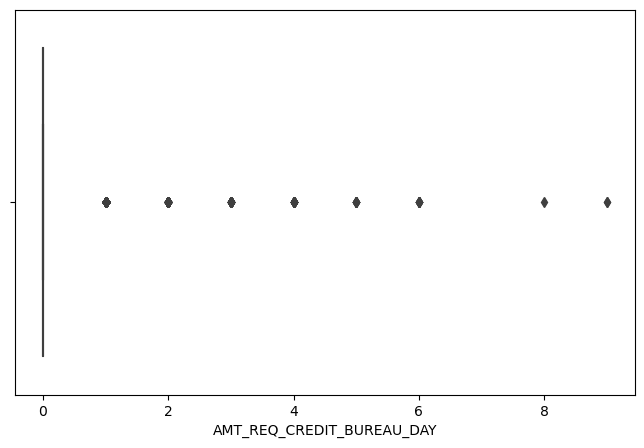

---------------------------------------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


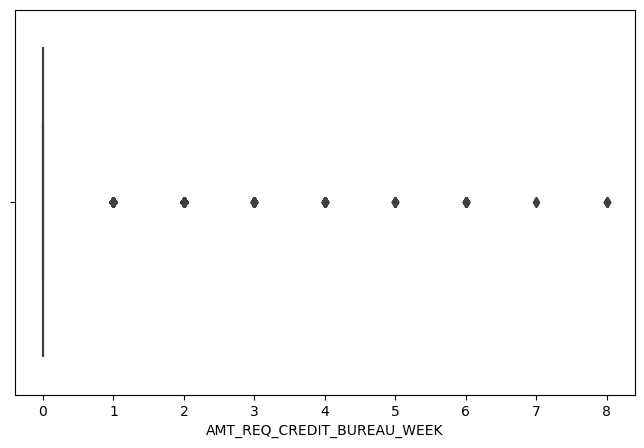

---------------------------------------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


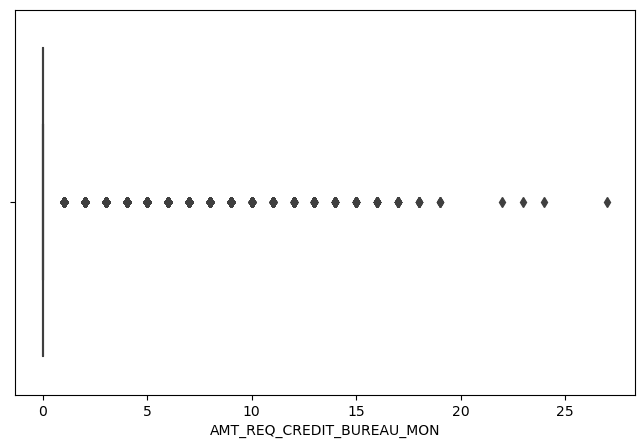

---------------------------------------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


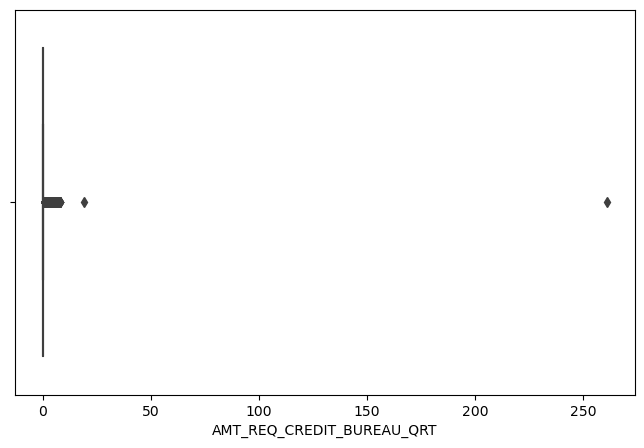

---------------------------------------------
count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


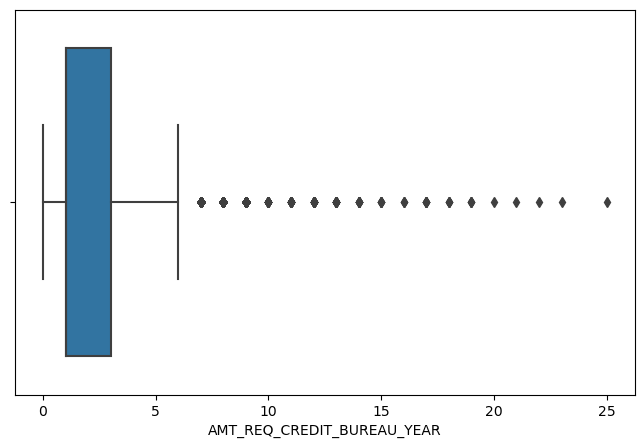

---------------------------------------------
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Years_Birth, dtype: float64


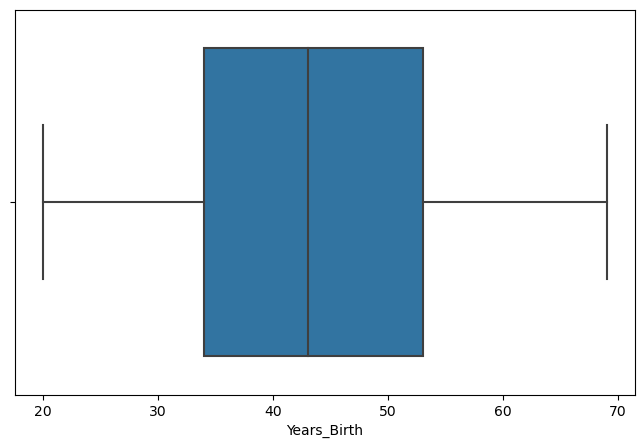

---------------------------------------------
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: Years_ID_PUBLISH, dtype: float64


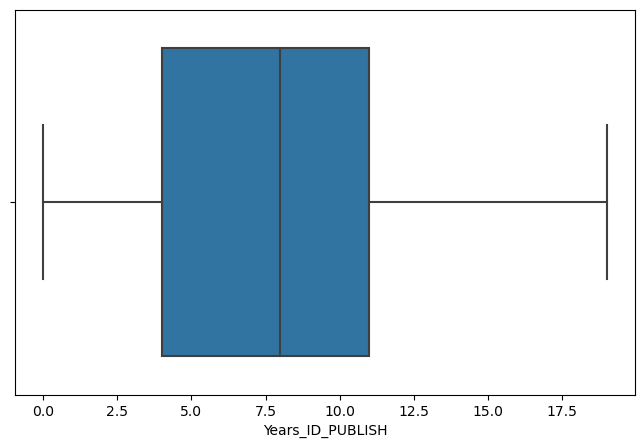

---------------------------------------------
count    307511.000000
mean       -175.121693
std         386.611073
min       -1000.000000
25%           0.000000
50%           3.000000
75%           7.000000
max          49.000000
Name: Years_EMPLOYED, dtype: float64


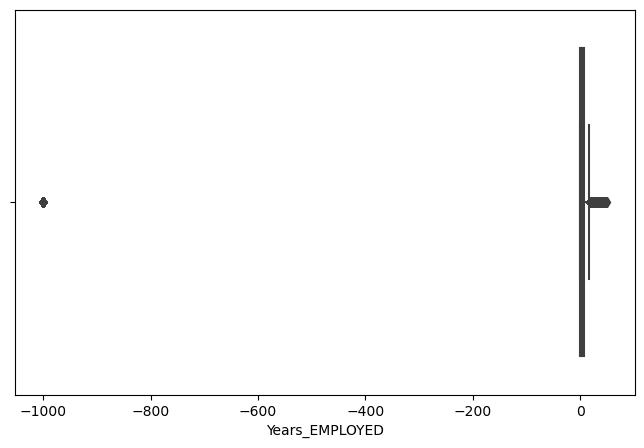

---------------------------------------------
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: Years_REGISTRATION, dtype: float64


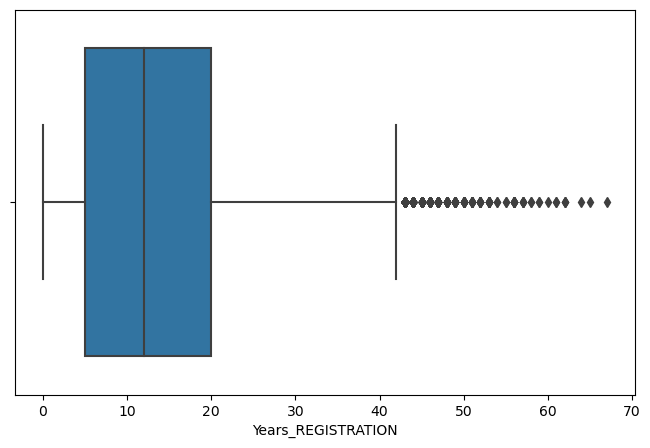

---------------------------------------------
count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: Years_LAST_PHONE_CHANGE, dtype: float64


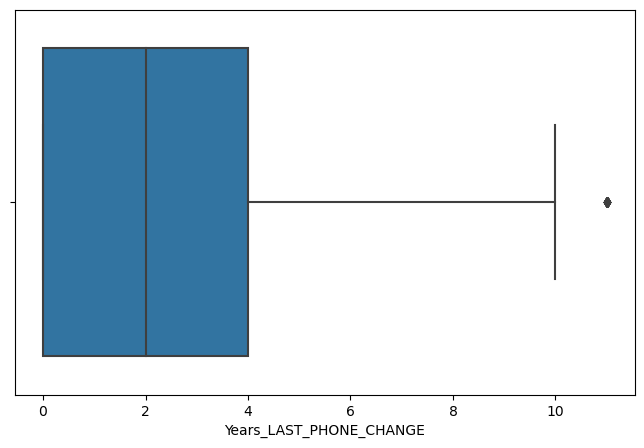

---------------------------------------------


In [58]:
for col in num_col_withoutflag:
    print(df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data = df, x = col)
    plt.show()
    print("---------------------------------------------")

Conclusion:
- AMT_INCOME_TOTAL: column has the fewer outliers and their is a huge difference between the 99th percentile and the max value, also we could see huge variations in mean and median due to outliers.
- AMT_CREDIT: column has the fewer outliers and their is a huge difference between the 99th percentile and the max value, also we could see huge variations in mean and median due to outliers.
- AMT_ANNUITY: column has the fewer outliers and their is a huge difference between the 99th percentile and the max value, also we could see significant variations in mean and median due to outliers.
- AMT_GOODS_PRICE: column has the fewer outliers and their is a huge difference between the 99th percentile and the max value, also we could see significant variations in mean and median due to outliers.
- REGION_POPULATION_RELATIVE: Column has only one outlier and there is not much difference between mean and median.

#### Univariate analysis with columns with target 0 and target 1

Plot on NAME_CONTRACT_TYPE for target 0 and 1


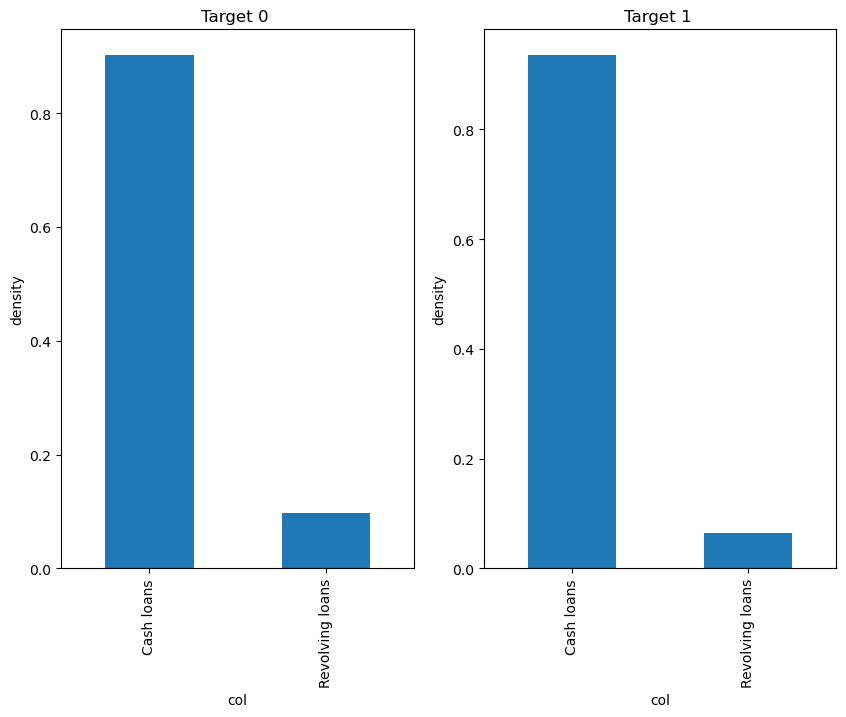



------------------------------------------------------------------------------


Plot on CODE_GENDER for target 0 and 1


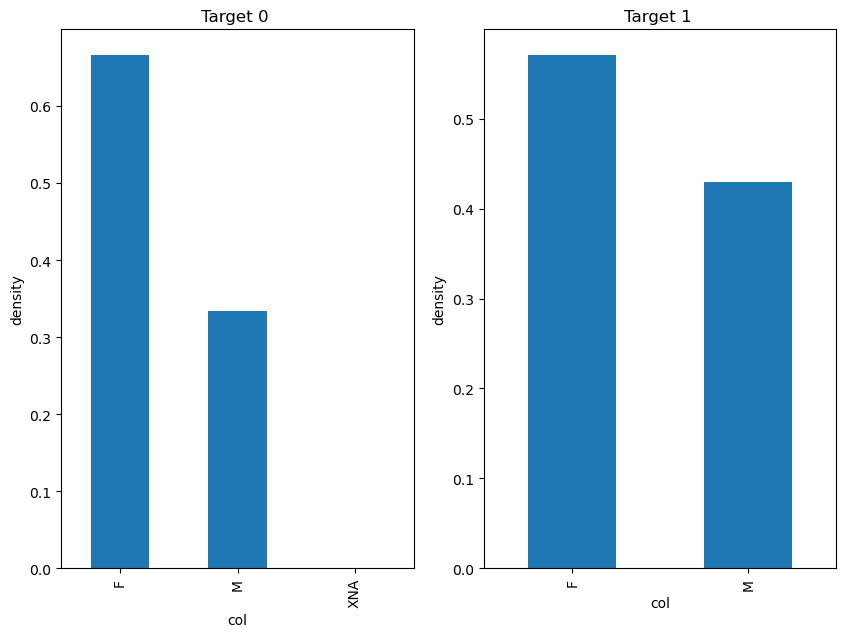



------------------------------------------------------------------------------


Plot on FLAG_OWN_CAR for target 0 and 1


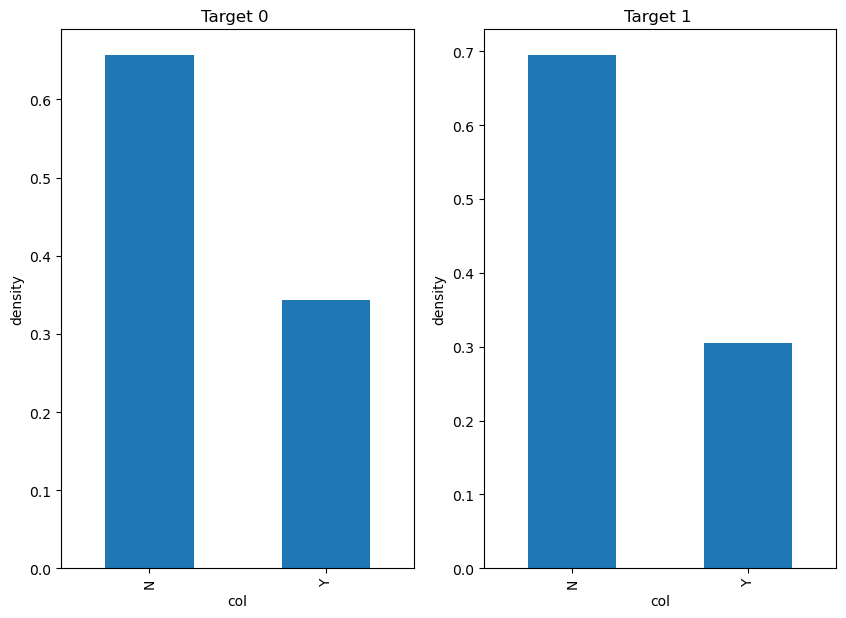



------------------------------------------------------------------------------


Plot on FLAG_OWN_REALTY for target 0 and 1


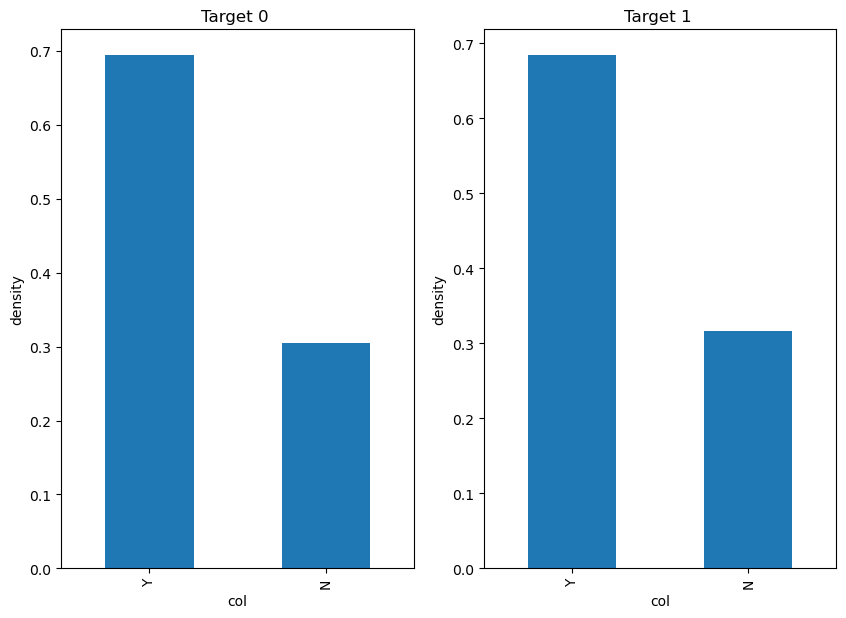



------------------------------------------------------------------------------


Plot on NAME_TYPE_SUITE for target 0 and 1


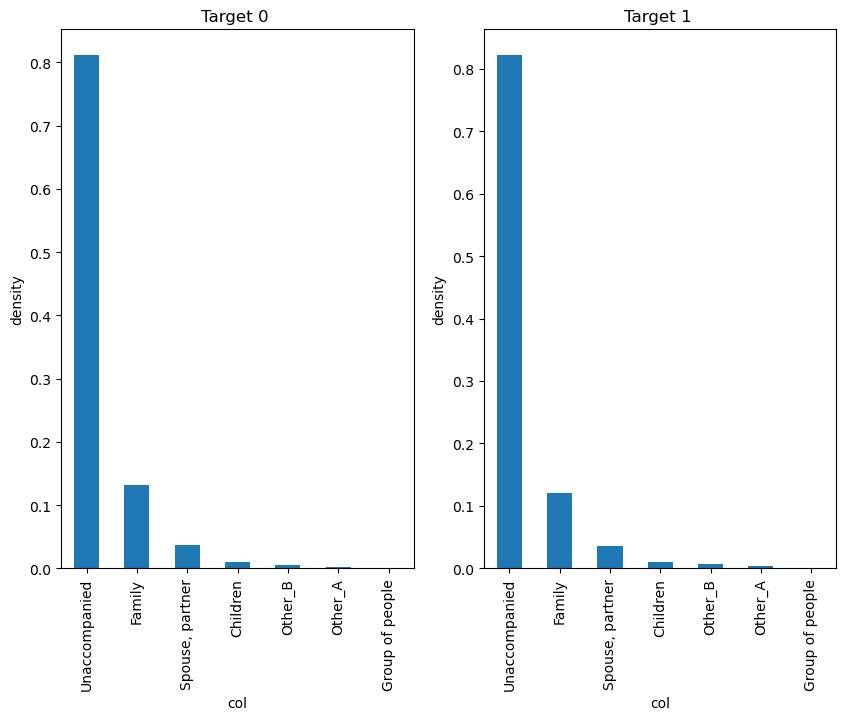



------------------------------------------------------------------------------


Plot on NAME_INCOME_TYPE for target 0 and 1


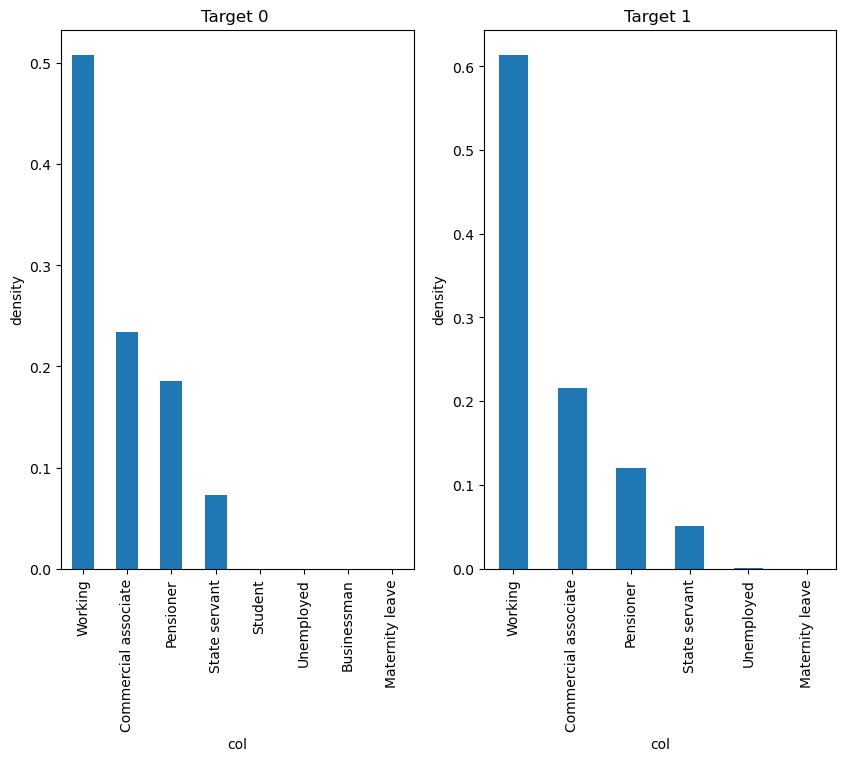



------------------------------------------------------------------------------


Plot on NAME_EDUCATION_TYPE for target 0 and 1


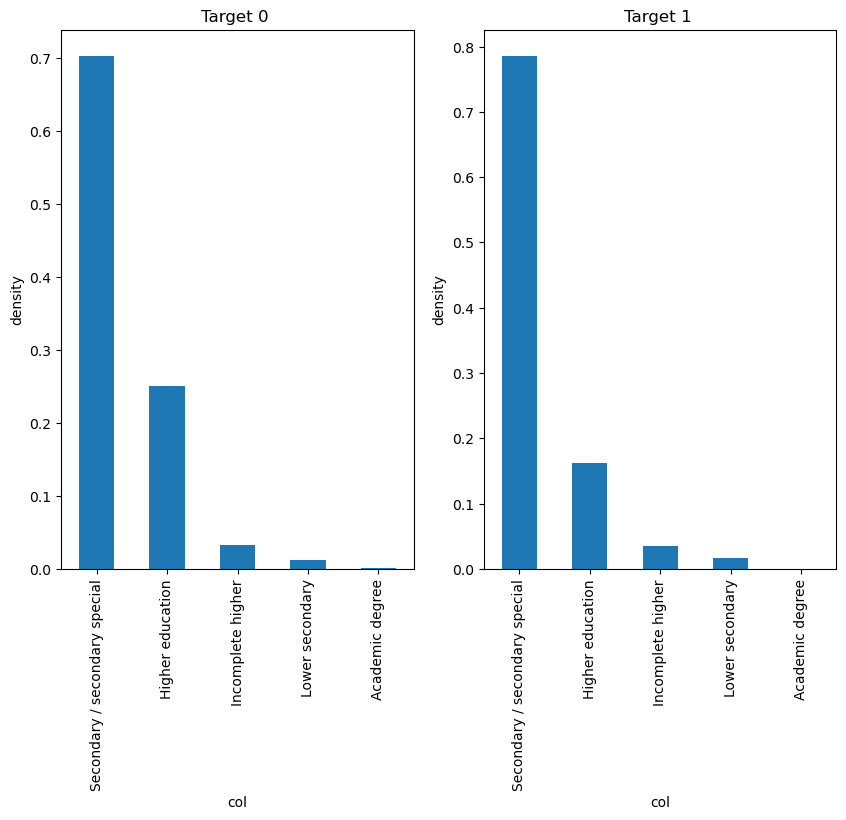



------------------------------------------------------------------------------


Plot on NAME_FAMILY_STATUS for target 0 and 1


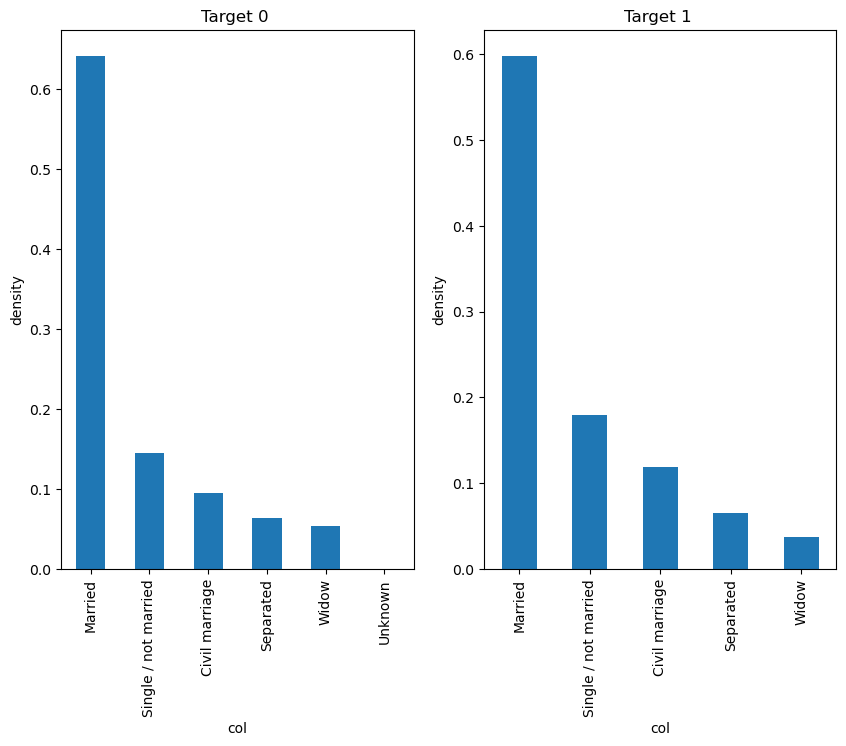



------------------------------------------------------------------------------


Plot on NAME_HOUSING_TYPE for target 0 and 1


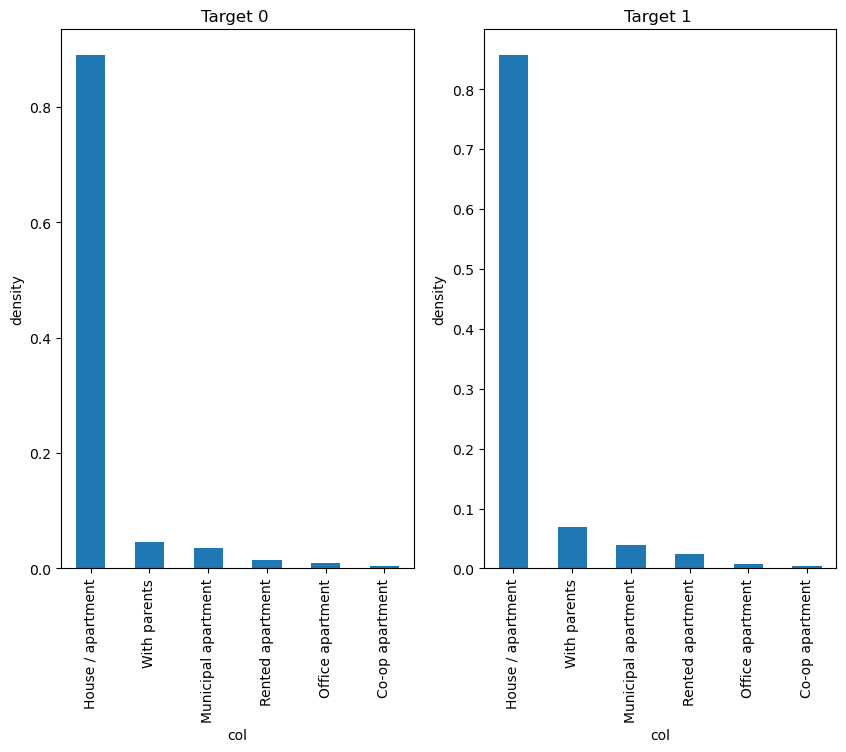



------------------------------------------------------------------------------


Plot on OCCUPATION_TYPE for target 0 and 1


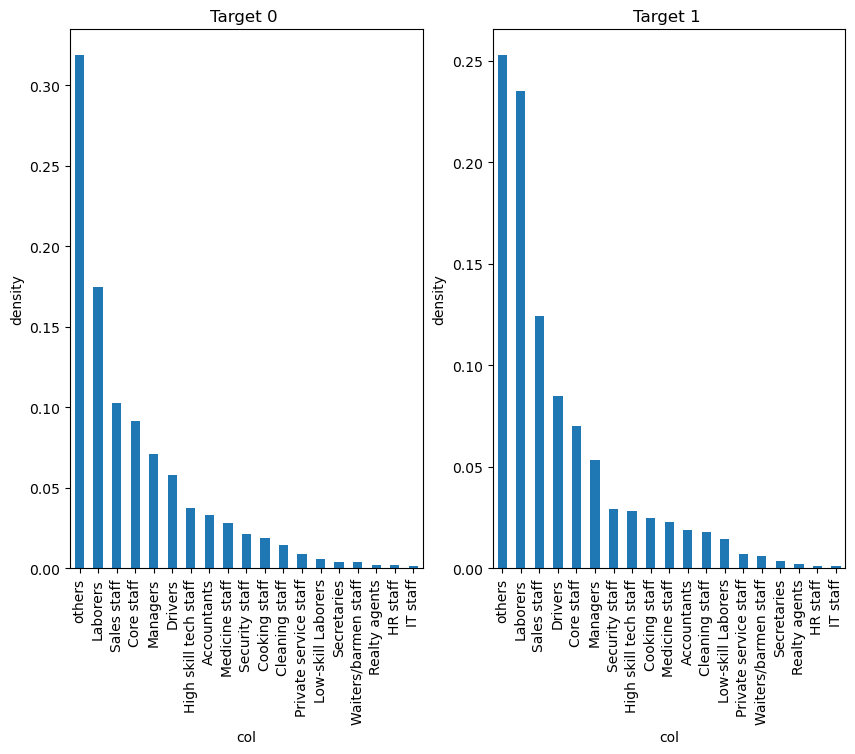



------------------------------------------------------------------------------


Plot on WEEKDAY_APPR_PROCESS_START for target 0 and 1


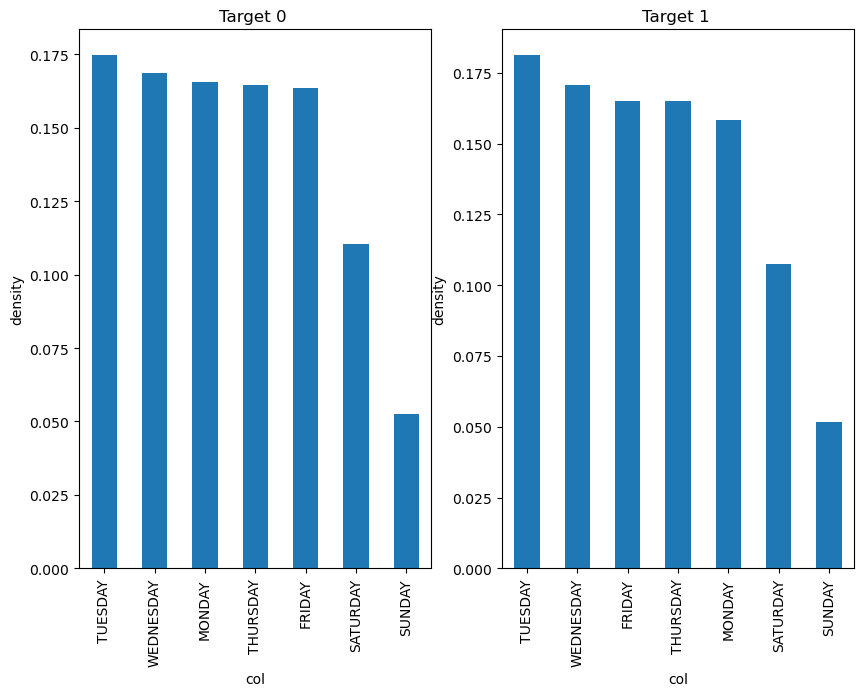



------------------------------------------------------------------------------


Plot on ORGANIZATION_TYPE for target 0 and 1


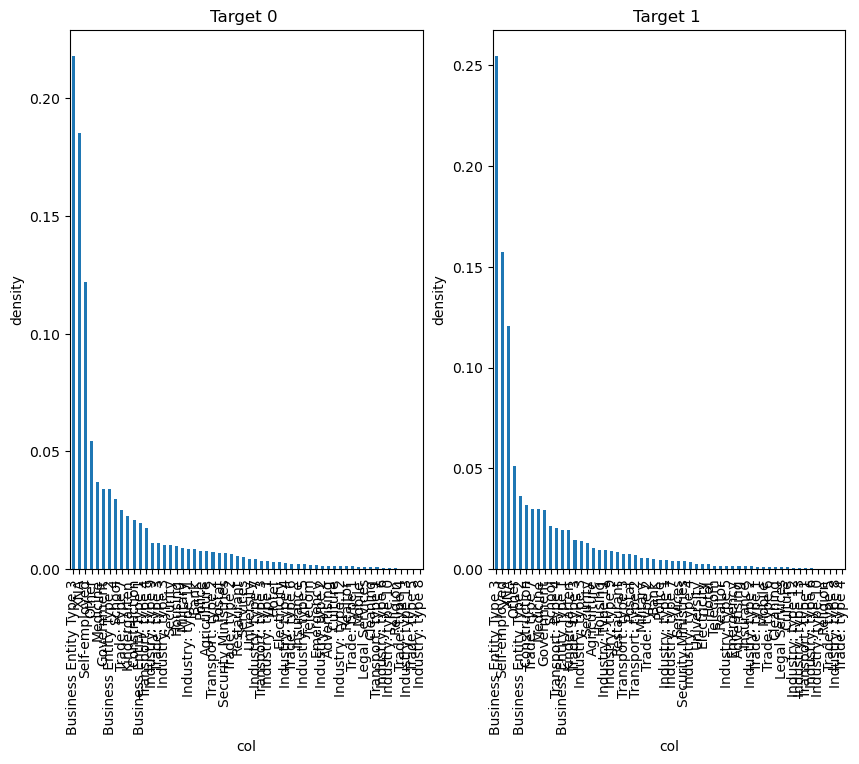



------------------------------------------------------------------------------


Plot on AMT_CREDIT_Category for target 0 and 1


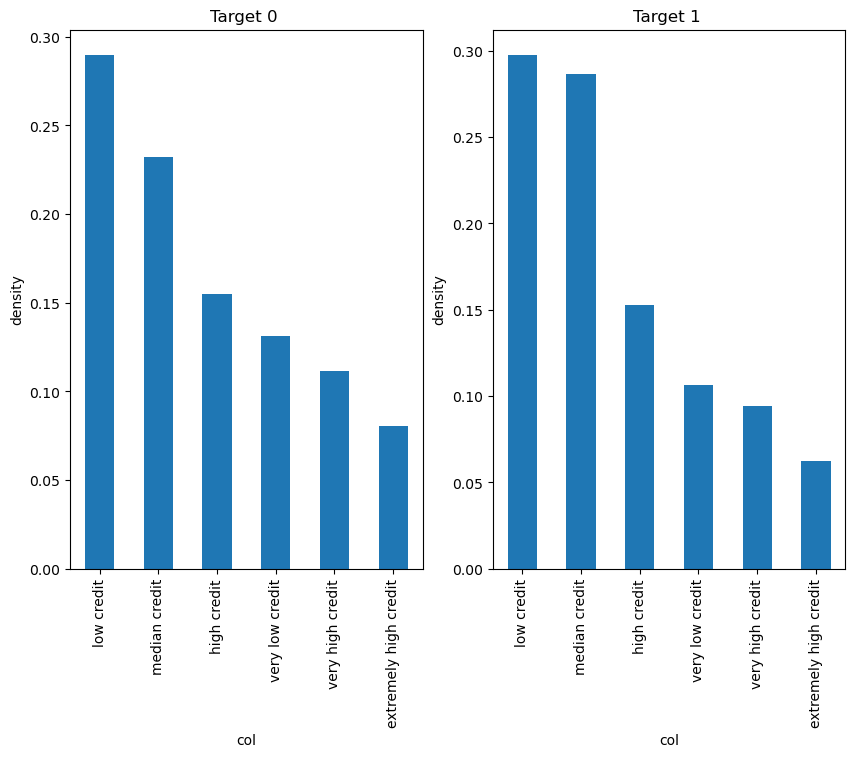



------------------------------------------------------------------------------


Plot on Age_category for target 0 and 1


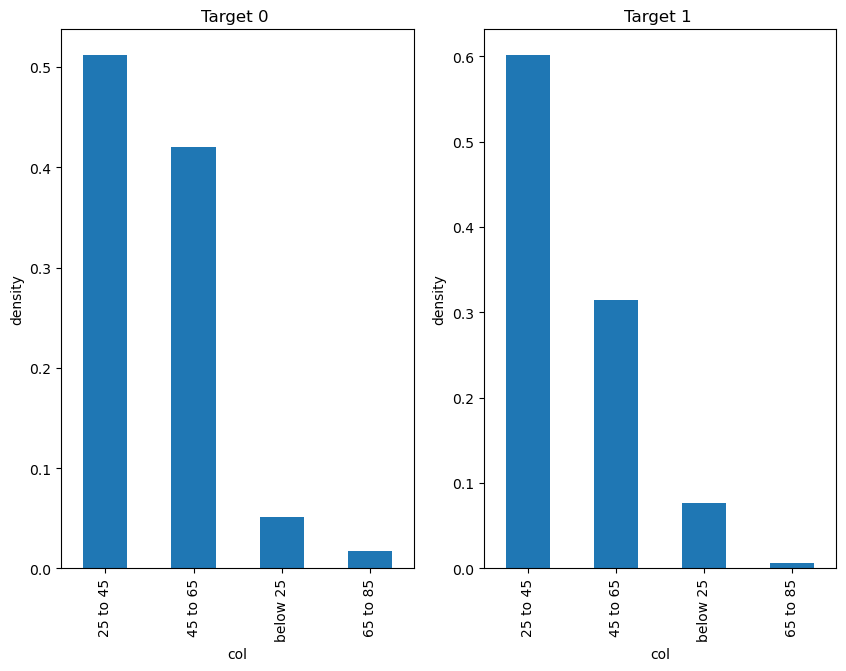



------------------------------------------------------------------------------




In [59]:
for col in cat_col:
    print(f"Plot on {col} for target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar0[col].value_counts(normalize = True).plot.bar()
    plt.title('Target 0 ')
    plt.xlabel('col')
    plt.ylabel('density')
    plt.subplot(1,2,2)
    tar1[col].value_counts(normalize = True).plot.bar()
    plt.title('Target 1 ')
    plt.xlabel('col')
    plt.ylabel('density')
    plt.show()
    print("\n\n------------------------------------------------------------------------------\n\n")

. Conclusion >> Below are the column insights
- NAME_CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1
- CODE_GENDER-Number of Female applicants are twice than that of male applicants both for Target 0 and 1
- FLAG OWN_CAR-Most (70%) of the applicants do not own a car both for Target 0 and 1
- FLAG OWN REALTY - Most(70%) of the applicants do not own a house both for Target 0 and 1
- NAME_TYPE_SUITE-Most(81%) of the applicants are Unaccompanied both for Target 0 and 1
- NAME_INCOME_TYPE-For both Target 0 and 1, Most(51%) of the applicants are earning their income from Work
- NAME_EDUCATION_TYPE-For both Target 0 and 1, almost 71% of the applicants have completed Secondary/secondary special education
- NAME_FAMILY_STATUS-63% of the applicants are married for both Target 0 and 1
- NAME_HOUSING TYPE - 88% of the housing type of applicants are House/apartment for both Target 0 and 1
- OCCUPATION_TYPE-Most (31%) of the applicants have other Occupation type, are non defaulters and Laborere, Sales staff, Drivers and core staff and
not able to repay the loan on time
- WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday and the least on Sunday
- ORGANIZATION_TYPE- Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

#### Analysis on AMT_GOODS_PRICE for target 0 and 1.

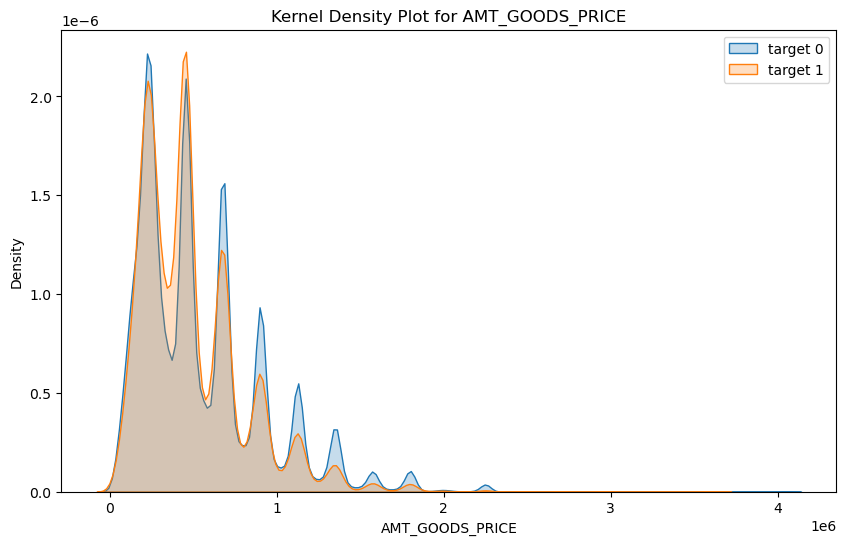

In [60]:
plt.figure(figsize=[10, 6])
sns.kdeplot(data=tar0['AMT_GOODS_PRICE'], label="target 0", shade=True)
sns.kdeplot(data=tar1['AMT_GOODS_PRICE'], label="target 1", shade=True)
plt.legend()
plt.title("Kernel Density Plot for AMT_GOODS_PRICE")
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("Density")
plt.show()

Conclusion: The price of the goods for which the loan is given has same variation for both target 0 and target 1.

# Bivariate and Multivariate Analysis:

#### Bivariate analysis between 
WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

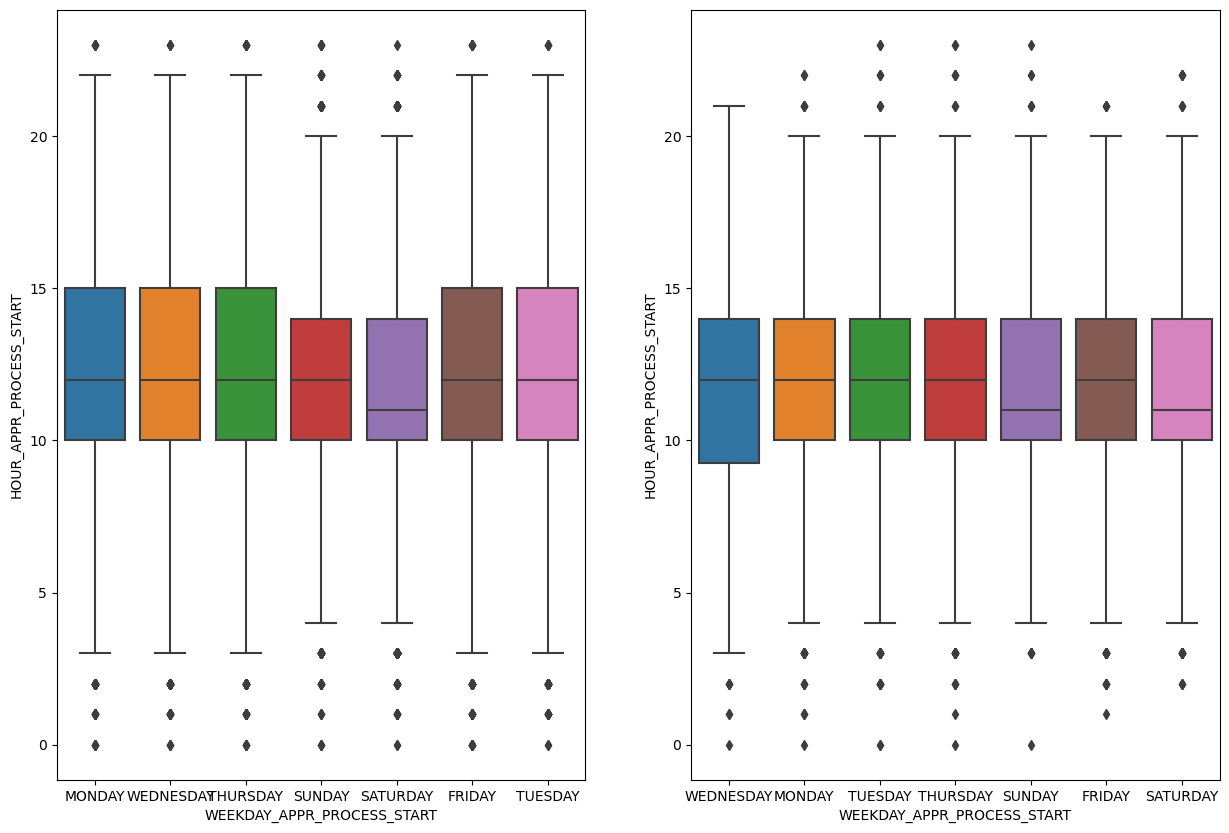

In [61]:
plt.figure(figsize=[15,10])

plt.subplot(1,2,1)
sns.boxplot(x = 'WEEKDAY_APPR_PROCESS_START', y = 'HOUR_APPR_PROCESS_START',data = tar0)

plt.subplot(1,2,2)
sns.boxplot(x = 'WEEKDAY_APPR_PROCESS_START', y = 'HOUR_APPR_PROCESS_START',data = tar1)
plt.show()

Conclusion >>
1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.
2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where
the time is between 10am to 11am for both Target 0 and 1
3. The loan defaulters have applied for the loan between 9:30am/10am and 2pm whereas the applicants who repay the loan on time have applied for the loan between 10am to 3pm.

### Bivariate analysis between Age_category and AMT_CREDIT:

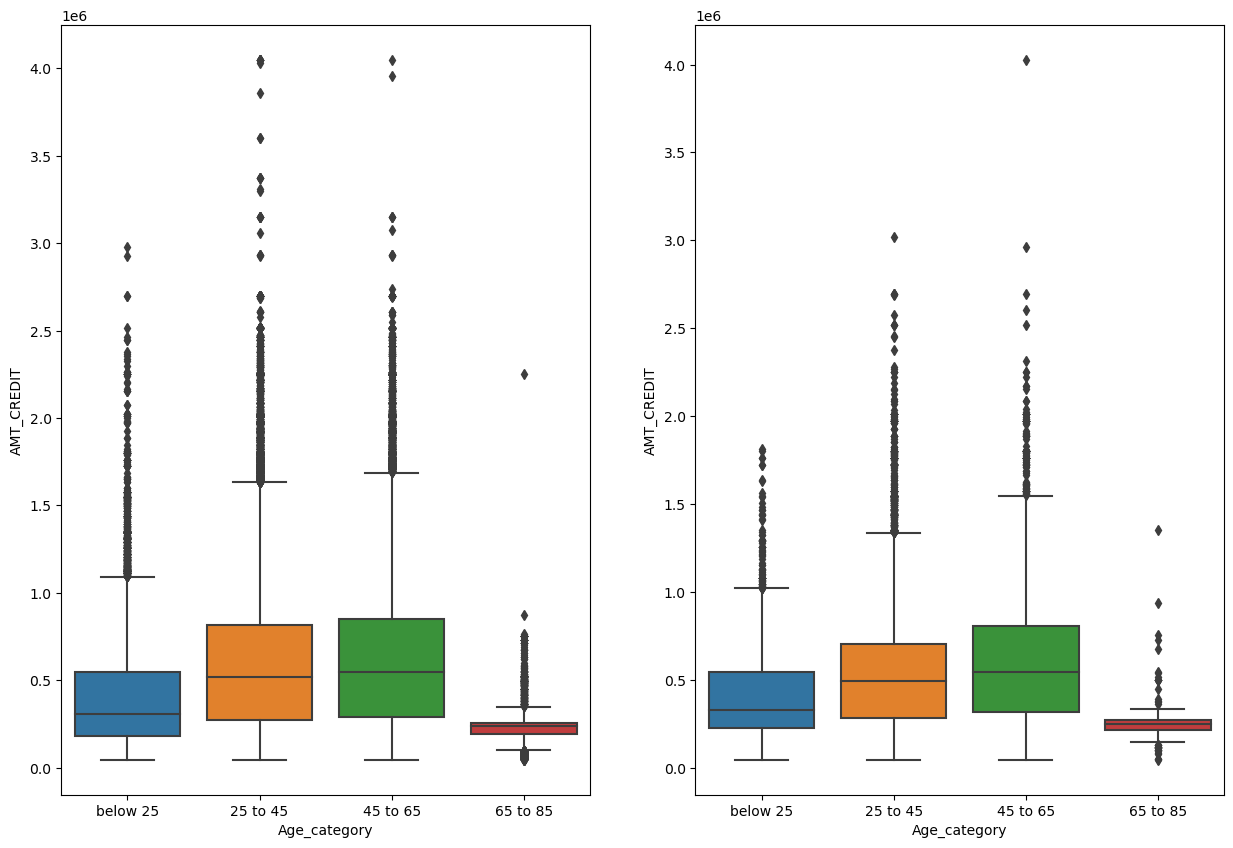

In [62]:
plt.figure(figsize=[15,10])

plt.subplot(1,2,1)
sns.boxplot(x = 'Age_category', y = 'AMT_CREDIT',data = tar0)

plt.subplot(1,2,2)
sns.boxplot(x = 'Age_category', y = 'AMT_CREDIT',data = tar1)
plt.show()

Conclusion >>
1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan properly
2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters
3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age

### Pair plots for Amounts column for target 0.

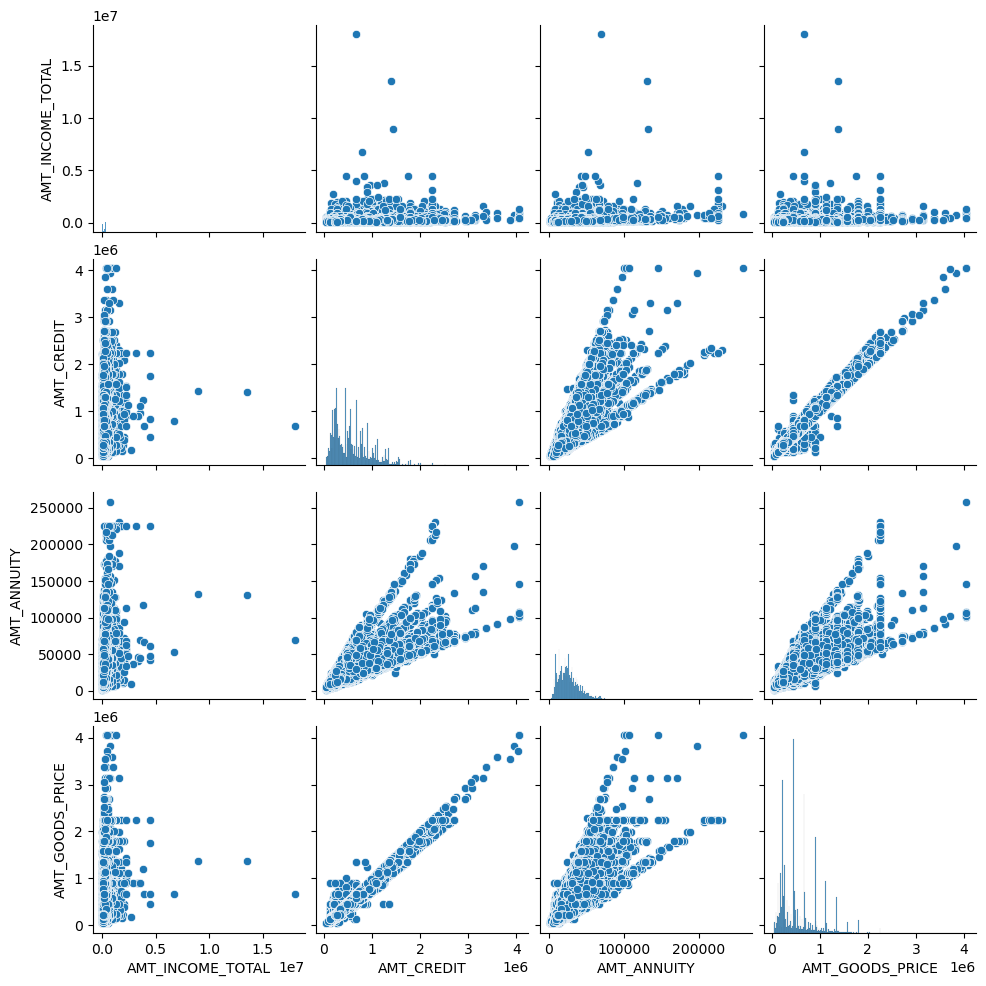

In [63]:
sns.pairplot(tar0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()


Conclusion >> For Applicants who are able to replay the loan on time
1. AMT_CREDIT Increases or varies linearly with AMT_GOODS PRICE and AMT CREDIT Increases with AMT ANNUITY
2. AMT_ANNUITY Increases with Increases in AMT_GOODS PRICE and AMT_Credit
3. AMT_GOODS PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY
4. AMT_INCOME TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT ANNUITY,AMT_GOODS_PRICE
.

### Pair plots for Amounts column for target 1.

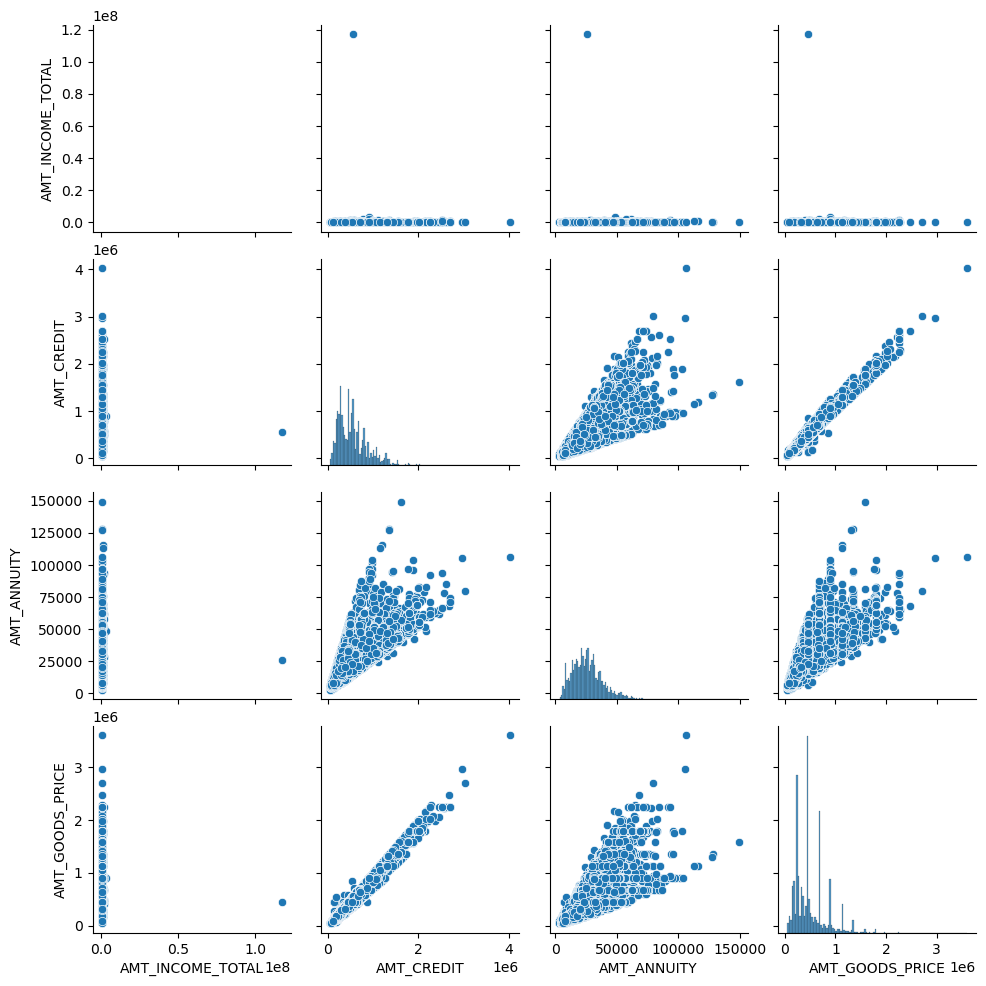

In [64]:
sns.pairplot(tar1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

Conclusion >> For Applicants who are unable to replay the loan on time
1. AMT_CREDIT Increases or varies linearly with AMT_GOODS PRICE and AMT CREDIT Increases with AMT ANNUITY
2. AMT_ANNUITY Increases with Increases in AMT_GOODS PRICE and AMT_Credit
3. AMT GOODS PRICE Increases with Increases in AMT_Credit and AMT ANNUITY
4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT AMT_ANNUITY AMT_GOODS PRICE

### Correlation between Numerical values:

In [65]:
corr_data = df[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','Years_Birth','Years_EMPLOYED','Years_REGISTRATION','Years_ID_PUBLISH','Years_LAST_PHONE_CHANGE']]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  Years_Birth  \
0          202500.0    406597.5      24700.5         351000.0           25   
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   

   Years_EMPLOYED  Years_REGISTRATION  Years_ID_PUBLISH  \
0               1                   9                 5   
1               3                   3                 0   
2               0                  11                 6   
3               8                  26                 6   
4               8                  11                 9   

   Years_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [66]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
Years_Birth                     -0.027226    0.055408    -0.009453   
Years_EMPLOYED                   0.064223    0.066840     0.104324   
Years_REGISTRATION              -0.027783   -0.009521    -0.038375   
Years_ID_PUBLISH                -0.008648    0.006831    -0.011100   
Years_LAST_PHONE_CHANGE          0.018592    0.077057     0.064893   

                         AMT_GOODS_PRICE  Years_Birth  Years_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027226        0.064223   
AMT_CREDIT                      0.986734     0.055408        0.066840   
AMT_ANNUITY                     0.774837    -0.009453        0.104324   
AMT_GOODS_PRICE                 1.000000     0.053484        0.064768   
Years_Birth                     0.053484     1.000000       -0.615802   
Years_EMPLOYED                  0.064768    -0.615802        1.000000   
Years_REGISTRATION             -0.011456     0.331704       -0.210254   
Years_ID_PUBLISH                0.009571     0.271453       -0.272005   
Years_LAST_PHONE_CHANGE         0.079095     0.086527        0.020341   

                         Years_REGISTRATION  Years_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027783         -0.008648   
AMT_CREDIT                        -0.009521          0.006831   
AMT_ANNUITY                       -0.038375         -0.011100   
AMT_GOODS_PRICE                   -0.011456          0.009571   
Years_Birth                        0.331704          0.271453   
Years_EMPLOYED                    -0.210254         -0.272005   
Years_REGISTRATION                 1.000000          0.101373   
Years_ID_PUBLISH                   0.101373          1.000000   
Years_LAST_PHONE_CHANGE            0.058831          0.093213   

                         Years_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018592  
AMT_CREDIT                              0.077057  
AMT_ANNUITY                             0.064893  
AMT_GOODS_PRICE                         0.079095  
Years_Birth                             0.086527  
Years_EMPLOYED                          0.020341  
Years_REGISTRATION                      0.058831  
Years_ID_PUBLISH                        0.093213  
Years_LAST_PHONE_CHANGE                 1.000000

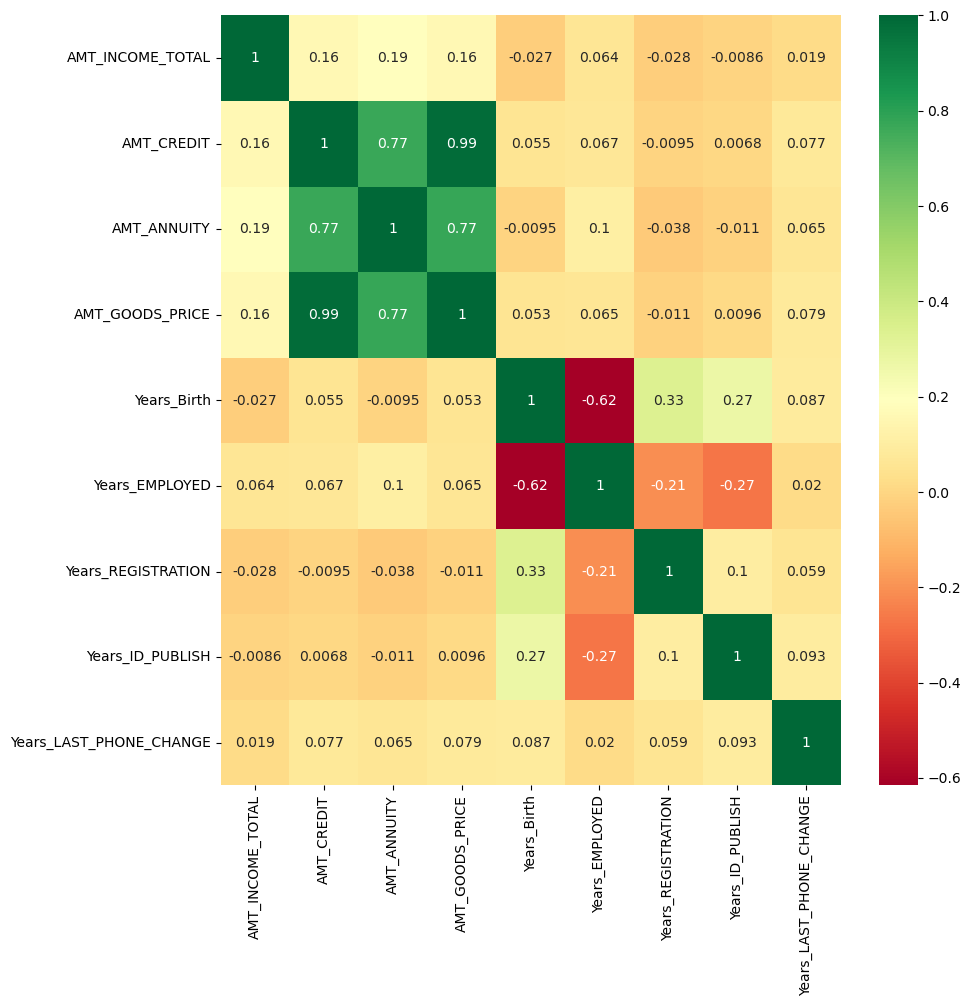

In [67]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn") #RdYlGn: red yellow green.
plt.show()

Conclusion >>
1. AMT_INCOME TOTAL - It has a positive corelation index of 0.16,0.19,0.16 with AMT_CREDIT, AMT_ANNUITY, AMT_GOODS PRICE respectively.
2. AMT_CREDIT - Is has negative coreltaion index of 0.064 with YEARS EMPLOYED and positive coreltaion index of 0.99,0.77 with AMT GOODS_PRICE, AMT_ANNUITY respectively.
3. AMT ANNUITY - Is has negative coreltalon index of 0.1 with YEARS EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT
4. AMT GOODS PRICE-It has a positive corelation with AMT_CREDIT,AMT_ANNUITY
5. YEARS BIRTH - It has a positive corelation with YEARS EMPLOYED, AMT_GOODS PRICE and negative coreltaion with AMT_ANNUITY, AMT_INCOME_TOTAL
6. YEARS EMPLOYED- Is has negative coreltaion index of 0.1 with AMT ANNUITY and has a positive corelation with YEARS REGISTRATION.
7. YEARS REGISTRATION - It has a positive corelation with YEARS_ID_PUBLISH, YEARS BIRTH, YEARS EMPLOYED
8. YEARS_ID_PUBLISH-It has a positive corelation with YEARS REGISTRATION and negative coreltaion with AMT_INCOME TOTAL AMT ANNUITY
9. YEARS_LAST_PHONE_CHANGE-It has negative coreltaion with YEARS EMPLOYED and positive corelation with AMT_GOODS_PRICE, YEARS_ID_PUBLISH

### Split the numerical variables based on target 0 and target 1 to find the co-relation.

In [68]:
corr_data0 = tar0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','Years_Birth','Years_EMPLOYED','Years_REGISTRATION','Years_ID_PUBLISH','Years_LAST_PHONE_CHANGE']]
corr_data0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  Years_Birth  \
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   
5           99000.0    490495.5      27517.5         454500.0           46   

   Years_EMPLOYED  Years_REGISTRATION  Years_ID_PUBLISH  \
1               3                   3                 0   
2               0                  11                 6   
3               8                  26                 6   
4               8                  11                 9   
5               4                  13                 1   

   Years_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        6

In [69]:
corr_data1 = tar1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE','Years_Birth','Years_EMPLOYED','Years_REGISTRATION','Years_ID_PUBLISH','Years_LAST_PHONE_CHANGE']]
corr_data1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  Years_Birth  \
0           202500.0    406597.5      24700.5         351000.0           25   
26          112500.0    979992.0      27076.5         702000.0           51   
40          202500.0   1193580.0      35028.0         855000.0           47   
42          135000.0    288873.0      16258.5         238500.0           36   
81           81000.0    252000.0      14593.5         252000.0           67   

    Years_EMPLOYED  Years_REGISTRATION  Years_ID_PUBLISH  \
0                1                   9                 5   
26               7                  18                 5   
40               3                   3                 2   
42               9                   0                12   
81           -1000                  14                11   

    Years_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        2  
42                        4  
81                        0

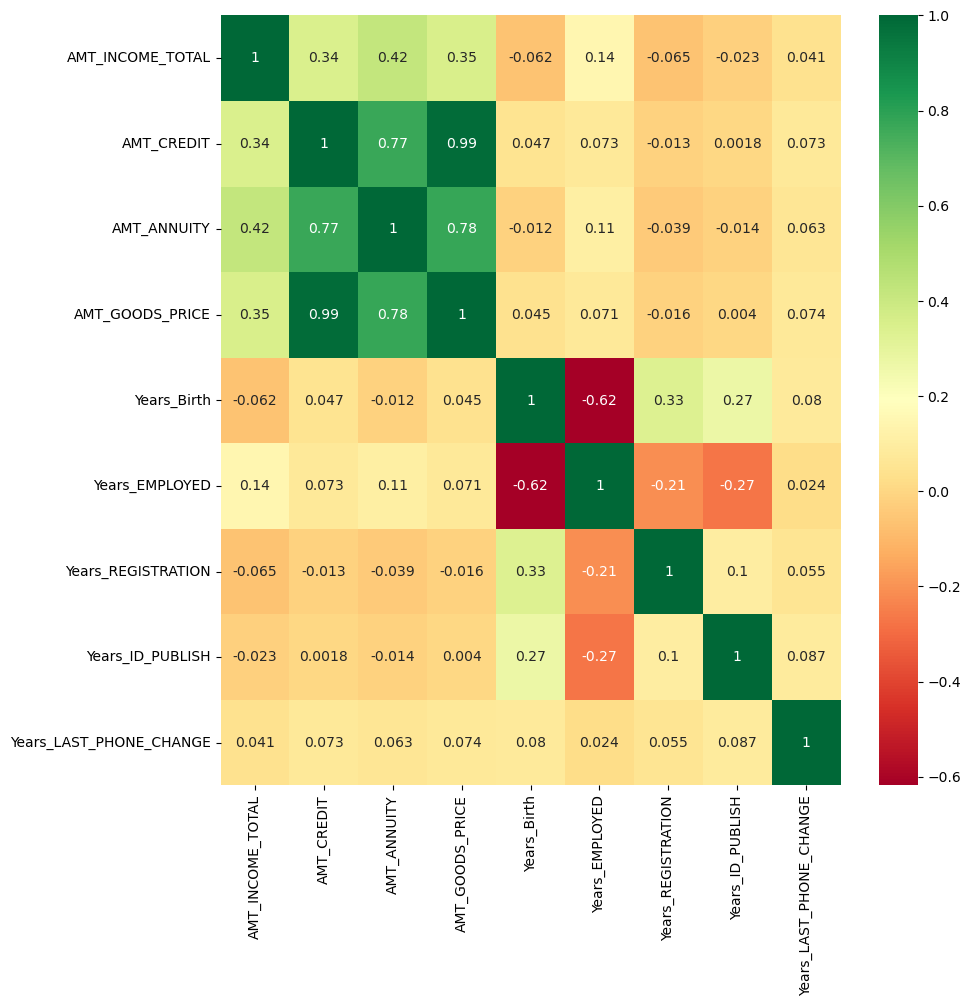

In [70]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data0.corr(),annot=True,cmap="RdYlGn") #RdYlGn: red yellow green.
plt.show()

• Conclusion >>
1. AMT INCOME_TOTAL - It has a positive corelation index of 0.34,0.42,0.35 with AMT CREDIT,AMT_ANNUITY,AMT_GOODS PRICE respectively and Negative with most of the other Year columns
2. AMT CREDIT-Is has a strong positive coreltaion index of 0.99,0.77 with AMT GOODS PRICE, AMT ANNUITY respectively.
3. AMT_ANNUITY - Is has positive coreltaion index of 0.77,0.78 with AMT_CREDIT,AMT GOODS PRICE respectively and Negative with most of the other Year columns
4. AMT_GOODS PRICE - It has a strong positive corelation index 0.78,0.99 with AMT ANNUITY, AMT_CREDIT

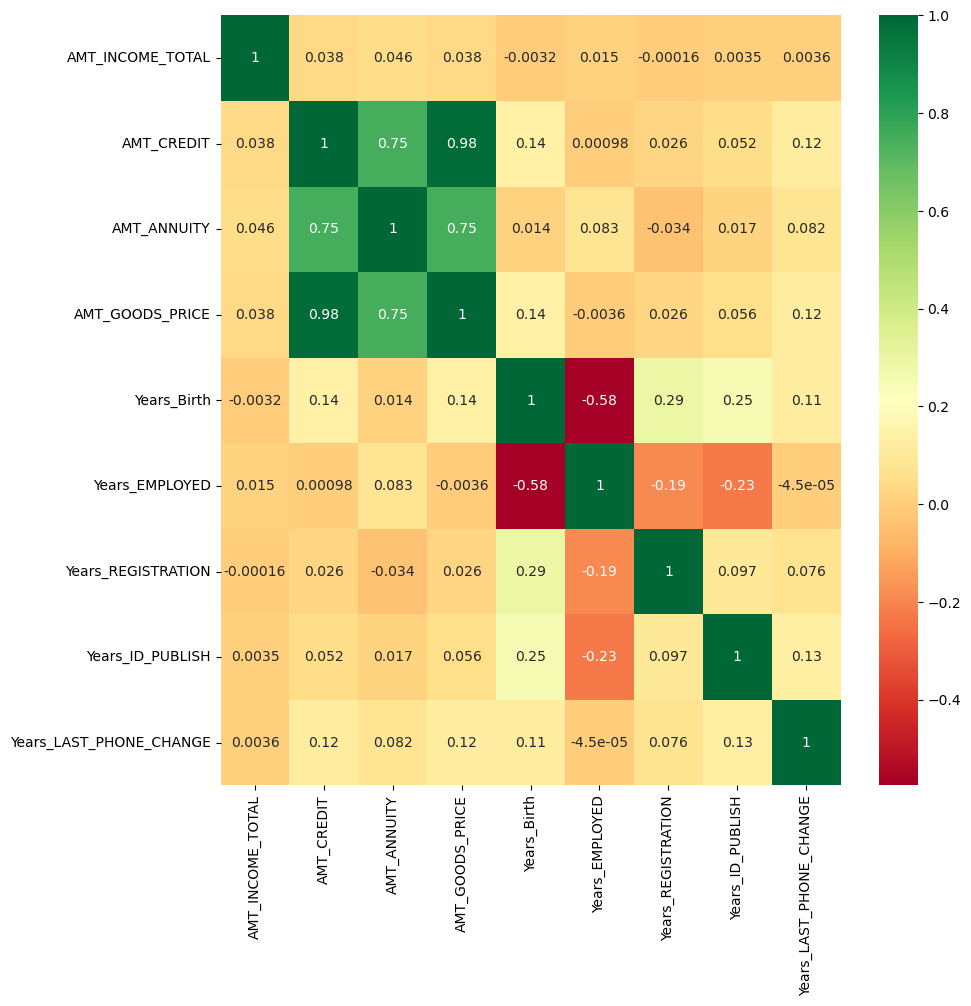

In [71]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data1.corr(),annot=True,cmap="RdYlGn") #RdYlGn: red yellow green.
plt.show()

• Conclusion >>
1. AMT INCOME_TOTAL - It is less correlated with AMT_CREDIT AMT_ANNUITY AMT GOODS PRICE respectively
2. AMT CREDIT-Is has a strong positive coreltaion index of 0.98,0.75 with AMT GOODS PRICE, AMT ANNUITY respectively and also positive corelation with other Year Columns
3. AMT ANNUITY - Is has positive coreltaion index of 0.75 with AMT CREDIT AMT GOODS PRICE and Negative with
YEAR EMPLOYED, YEAR_REGISTRATION
4. AMT GOODS PRICE - It has a strong positive corelation index 0.75,0.98 with AMT ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns

# READ PREVIOUS APPLICATION CSV

In [72]:
p_df = pd.read_csv('previous_application.csv')
p_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [73]:
print(f"Shape of Previous dataset: {p_df.shape}")
print(p_df.info())

Shape of Previous dataset: (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  R

## Data quality check:
#### checking for the percentage of null values present in the dataset.

In [74]:
p_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [75]:
#dropping columns which has null values percentage greater than 49%:
null_percentages = p_df.isnull().mean() * 100

# Identify columns where the percentage of null values is greater than 47%
columns_to_remove = null_percentages[null_percentages > 49].index
p_df.drop(columns=columns_to_remove, inplace=True)
p_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0    136444.5         112500.0   
3               450000.0    470790.0         450000.0   
4               337500.0    404055.0         337500.0   
...                  ...         ...              ...   
1670209         267295.5    311400.0         267295.5   
1670210          87750.0     64291.5          87750.0   
1670211         105237.0    102523.5         105237.0   
1670212         180000.0    191880.0         180000.0   
1670213         360000.0    360000.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                          XAP             Approved            -73   
1                          XNA             Approved           -164   
2                          XNA             Approved           -301   
3                          XNA             Approved           -512   
4                      Repairs              Refused           -781   
...                        ...                  ...            ...   
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0        Cash through the bank                XAP         Repeater   
1                       

In [76]:
print(p_df.shape)
p_df.isnull().mean()*100

(1670214, 32)


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

## Imputing missing values:

- handling negative values in the dataset first.

In [77]:
# Step 1: Select numeric columns (integers and floats)
numeric_columns = p_df.select_dtypes(include=['int', 'float'])

# Step 2: Check for negative values in each numeric column
has_negative_values = (numeric_columns < 0).any()

# Step 3: Get the list of columns containing negative valueshttp://localhost:8888/notebooks/Implementation%20_%20Credit%20EDA.ipynb#
columns_with_negative_values = has_negative_values[has_negative_values].index.tolist()

# Step 4: Display the list of columns
print("Columns with negative values:", columns_with_negative_values)

Columns with negative values: ['DAYS_DECISION', 'SELLERPLACE_AREA', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']


In [78]:
# Apply the absolute function to the specified columns
p_df[columns_with_negative_values] = p_df[columns_with_negative_values].abs()

# Display the updated DataFrame
p_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0    136444.5         112500.0   
3               450000.0    470790.0         450000.0   
4               337500.0    404055.0         337500.0   
...                  ...         ...              ...   
1670209         267295.5    311400.0         267295.5   
1670210          87750.0     64291.5          87750.0   
1670211         105237.0    102523.5         105237.0   
1670212         180000.0    191880.0         180000.0   
1670213         360000.0    360000.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                          XAP             Approved             73   
1                          XNA             Approved            164   
2                          XNA             Approved            301   
3                          XNA             Approved            512   
4                      Repairs              Refused            781   
...                        ...                  ...            ...   
1670209                    XAP             Approved            544   
1670210                    XAP             Approved           1694   
1670211                    XAP             Approved           1488   
1670212                    XNA             Approved           1185   
1670213                    XNA             Approved           1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0        Cash through the bank                XAP         Repeater   
1                       

In [79]:
numeric_columns

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     1730.430          17145.0     17145.0   
1           2802425      108129    25188.615         607500.0    679671.0   
2           2523466      122040    15060.735         112500.0    136444.5   
3           2819243      176158    47041.335         450000.0    470790.0   
4           1784265      202054    31924.395         337500.0    404055.0   
...             ...         ...          ...              ...         ...   
1670209     2300464      352015    14704.290         267295.5    311400.0   
1670210     2357031      334635     6622.020          87750.0     64291.5   
1670211     2659632      249544    11520.855         105237.0    102523.5   
1670212     2785582      400317    18821.520         180000.0    191880.0   
1670213     2418762      261212    16431.300         360000.0    360000.0   

         AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
0                17145.0                       15                       1   
1               607500.0                       11                       1   
2               112500.0                       11                       1   
3               450000.0                        7                       1   
4               337500.0                        9                       1   
...                  ...                      ...                     ...   
1670209         267295.5                       12                       1   
1670210          87750.0                       15                       1   
1670211         105237.0                       12                       1   
1670212         180000.0                        9                       1   
1670213         360000.0                       10                       1   

         DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0                  -73                35         12.0            365243.0   
1                 -164                -1         36.0            365243.0   
2                 -301                -1         12.0            365243.0   
3                 -512                -1         12.0            365243.0   
4                 -781                -1         24.0                 NaN   
...                ...               ...          ...                 ...   
1670209           -544                43         30.0            365243.0   
1670210          -1694                43         12.0            365243.0   
1670211          -1488              1370         10.0            365243.0   
1670212          -1185                -1         12.0            365243.0   
1670213          -1193                -1         48.0            365243.0   

         DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0                 -42.0                      300.0          -42.0   
1                -134.0                      916.0       365243.0   
2                -271.0                       59.0       365243.0   
3                -482.0                     -152.0         -182.0   
4                   NaN                        NaN            NaN   
...                 ...                        ...            ...   
1670209          -508.0                      362.0         -358.0   
1670210         -1604.0                    -1274.0        -1304.0   
1670211         -1457.0                    -1187.0        -1187.0   
1670212         -1155.0                     -825.0         -825.0   
1670213         -1163.0                      247.0         -443.0   

         DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0                   -37.0                        0.0  
1                365243.0                        1.0  
2                365243.0                        1.0  
3                  -177.0                        1.0  
4                     NaN                        NaN  
...                   ...                        ...  
1670209            -

In [80]:
p_df['AMT_ANNUITY'].fillna(p_df['AMT_ANNUITY'].median(),inplace= True)
p_df['AMT_GOODS_PRICE'].fillna(p_df['AMT_GOODS_PRICE'].median(),inplace= True)
p_df['CNT_PAYMENT'].fillna(p_df['CNT_PAYMENT'].median(),inplace= True)
p_df['DAYS_FIRST_DRAWING'].fillna(p_df['DAYS_FIRST_DRAWING'].median(),inplace= True)
p_df['DAYS_LAST_DUE_1ST_VERSION'].fillna(p_df['DAYS_LAST_DUE_1ST_VERSION'].median(),inplace= True)
p_df['DAYS_FIRST_DUE'].fillna(p_df['DAYS_FIRST_DUE'].median(),inplace= True)
p_df['DAYS_LAST_DUE'].fillna(p_df['DAYS_LAST_DUE'].median(),inplace= True)
p_df['DAYS_TERMINATION'].fillna(p_df['DAYS_TERMINATION'].median(),inplace= True)
p_df['NFLAG_INSURED_ON_APPROVAL'].fillna(p_df['NFLAG_INSURED_ON_APPROVAL'].mode()[0],inplace= True)

In [81]:
p_df['PRODUCT_COMBINATION'].value_counts(normalize = True)*100

Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

In [82]:
for index, item in enumerate(p_df['PRODUCT_COMBINATION']):
    if pd.isnull(item):
        p_df['PRODUCT_COMBINATION'][index] = 'others'

In [83]:
p_df.isnull().mean()*100

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                    0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
AMT_GOODS_PRICE                0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
CNT_PAYMENT                    0.00000
NAME_YIELD_GROUP               0.00000
PRODUCT_COMBINATION      

## Binning of Continous Columns

In [84]:
p_df['AMT_CREDIT_Category'] = pd.cut(p_df['AMT_CREDIT'],[0,200000,400000,600000,800000,1000000,1200000],
                         labels = ["very low credit",'low credit','median credit','high credit','very high credit','extremely high credit'])

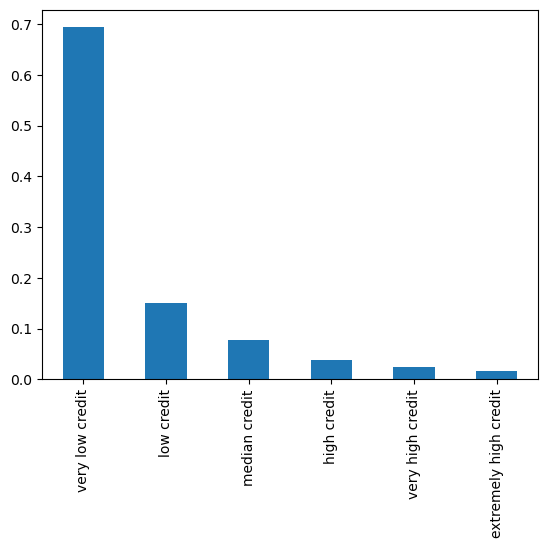

In [85]:
p_df['AMT_CREDIT_Category'].value_counts(normalize = True).plot.bar()
plt.show()

## Data Imbalance Check:

In [109]:
approved = p_df[p_df['NAME_CONTRACT_STATUS'] == "Approved"]
cancelled = p_df[p_df['NAME_CONTRACT_STATUS'] == "Canceled"]
refused = p_df[p_df['NAME_CONTRACT_STATUS'] == "Refused"]
unused = p_df[p_df['NAME_CONTRACT_STATUS'] == "Unused offer"]

In [91]:
p_df['NAME_CONTRACT_STATUS'].value_counts(normalize = True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

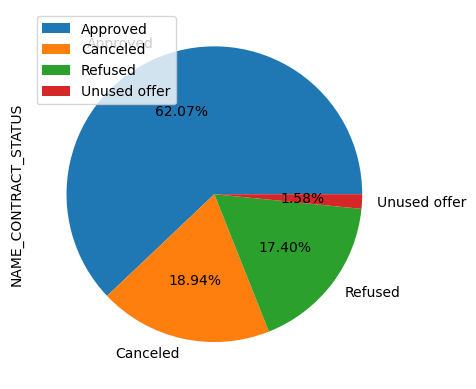

In [93]:
p_df['NAME_CONTRACT_STATUS'].value_counts(normalize = True).plot.pie(autopct = "%1.2f%%")
plt.legend()
plt.show()

- Conclusion: 62% of the applicants had the loan approved 19% are cancelled 17% are refused and 2% are unused

# Univariate analysis:

In [94]:
# Lets see which all columns are categorical and which of them are numerical in our dataset.
cat_col = list(p_df.select_dtypes(include=[object, 'category']).columns)
num_col = list(p_df.select_dtypes(include=[int, float]).columns)

In [95]:
cat_col

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'AMT_CREDIT_Category',
 'AMT_GOODS_PRICE_Category']

In [96]:
num_col

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'AMT_GOODS_PRICE_normalized']

In [100]:
# Picking relevant columns from the list.

In [98]:
cat_col = ['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION','CNT_PAYMENT',]

In [99]:
num_col = ['HOUR_APPR_PROCESS_START','DAYS_DECISION','AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',]

### Plot on categorical columns:

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64


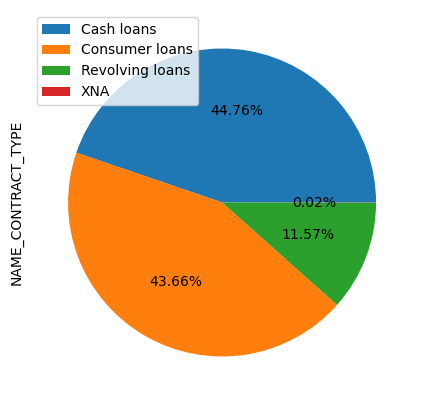

TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


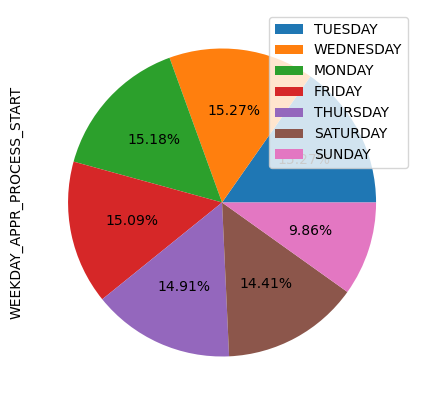

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64


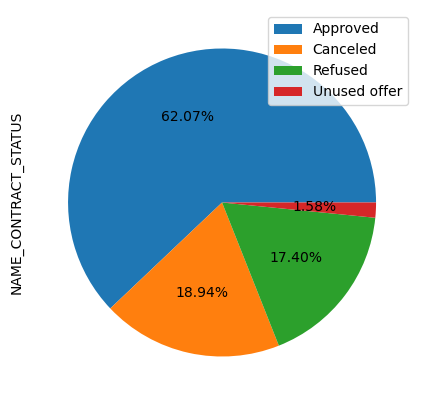

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64


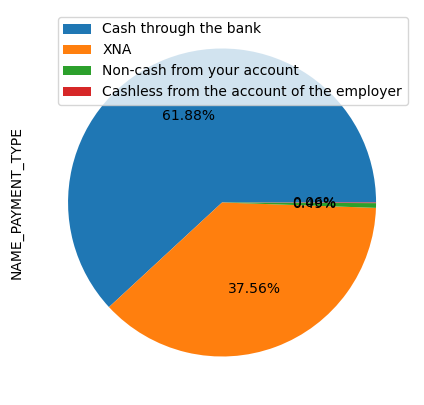

Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64


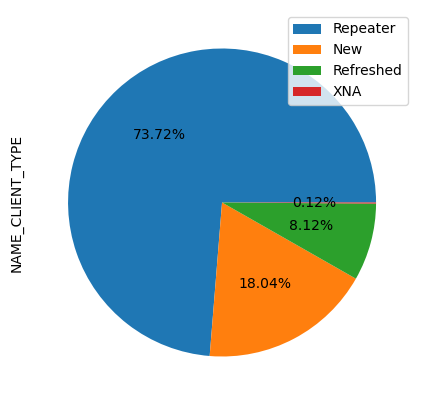

Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: CHANNEL_TYPE, dtype: float64


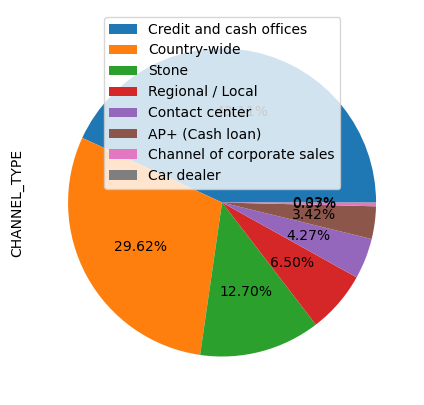

XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64


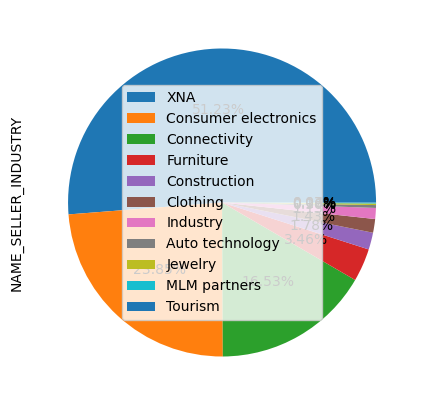

XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64


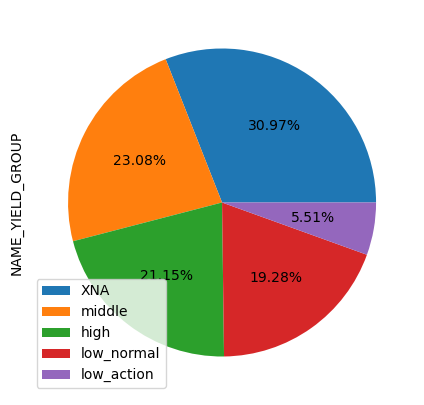

Cash                              0.171230
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
others                            0.000207
Name: PRODUCT_COMBINATION, dtype: float64


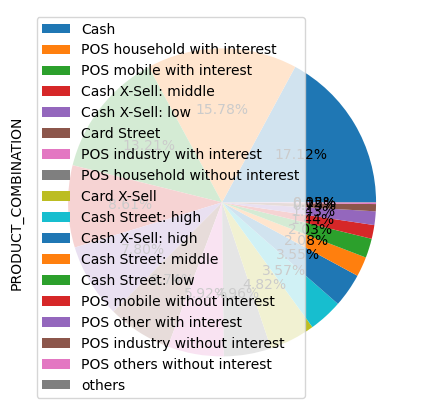

12.0    4.162814e-01
6.0     1.140339e-01
0.0     8.680624e-02
10.0    8.492984e-02
24.0    8.248284e-02
18.0    4.635933e-02
36.0    4.345731e-02
60.0    3.209170e-02
48.0    2.832930e-02
8.0     1.817073e-02
4.0     1.612009e-02
30.0    1.013283e-02
14.0    4.941283e-03
42.0    4.272506e-03
16.0    3.418724e-03
5.0     2.369157e-03
54.0    1.259719e-03
20.0    1.080700e-03
7.0     8.585726e-04
9.0     7.400249e-04
3.0     6.585982e-04
15.0    5.412480e-04
11.0    4.005475e-04
72.0    8.322287e-05
13.0    3.053501e-05
17.0    2.873883e-05
84.0    2.694266e-05
22.0    2.215285e-05
23.0    1.616559e-05
26.0    7.783434e-06
35.0    6.585982e-06
66.0    5.987257e-06
28.0    4.789805e-06
29.0    4.789805e-06
32.0    3.592354e-06
19.0    3.592354e-06
34.0    2.394903e-06
59.0    2.394903e-06
41.0    1.796177e-06
47.0    1.796177e-06
45.0    1.796177e-06
21.0    1.796177e-06
44.0    1.197451e-06
39.0    1.197451e-06
46.0    1.197451e-06
38.0    1.197451e-06
33.0    5.987257e-07
40.0    5.987

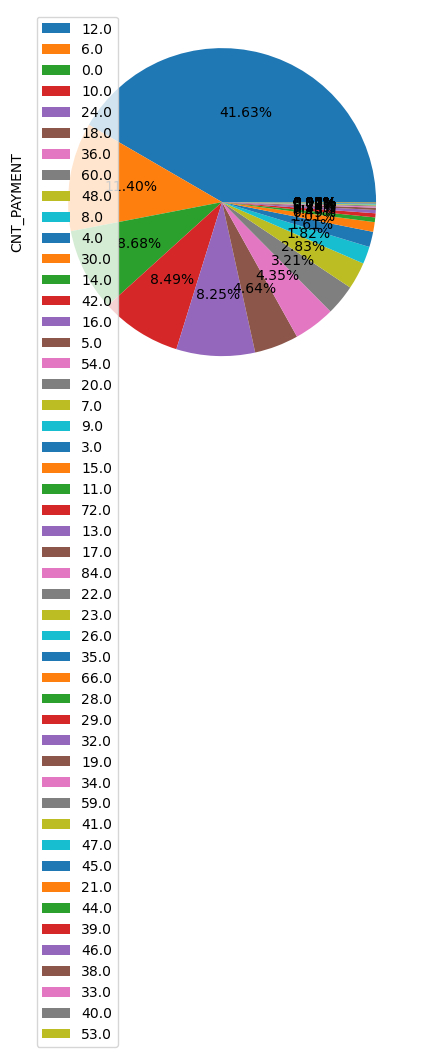

In [102]:
for col in cat_col:
    print(p_df[col].value_counts(normalize = True))
    plt.figure(figsize=[5,5])
    p_df[col].value_counts(normalize = True).plot.pie(labeldistance = None,autopct = '%1.2f%%')
    plt.legend()
    plt.show()

﻿ Conclusion >>
1. NAME_CONTRACT_TYPE-45% Applicants received Cash loans,44% Applicants received Consumer loans, 12% received Revolving during previous
application
2. WEEKDAY APPR_PROCESS_START-All the days have almost equal number of previous loan application
3. NAME_CONTRACT_STATUS - 62% of applications are approved, 19% Cancelled, 17% Refused and 2% unused
4. NAME_PAYMENT_TYPE-62% of Payment type are Cash through bank, 32% Other modes
5. NAME CLIENT TYPE-74% of Applicants are Repeaters, 18% are New applicants, 8% are Refreshed Appplicants
6. NAME SELLER INDUSTRY-51% are from other Industries, 24%, 17% are from Consumer electronics, Connectivity Industry respectively
7. CHANNEL TYPE-43% Channel type is Credit and cash offices, 29% are country wide
8. NAME YIELD_GROUP- Majority of the yield group are others
9. PRODUCT COMBINATION - Most used PRODUCT COMBINATION is Cash followed by POS household with interest, POS mobile with interest

### Plot on Numerical Columns:

99th percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


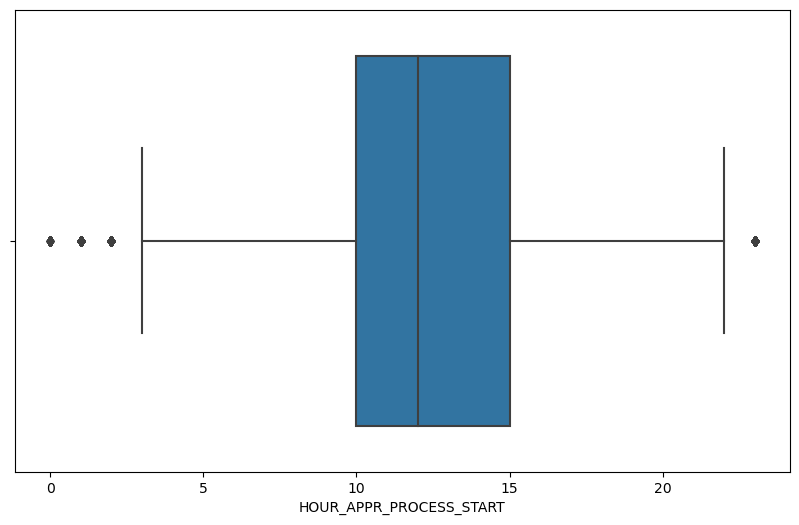

------------------------------------------------------------
99th percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


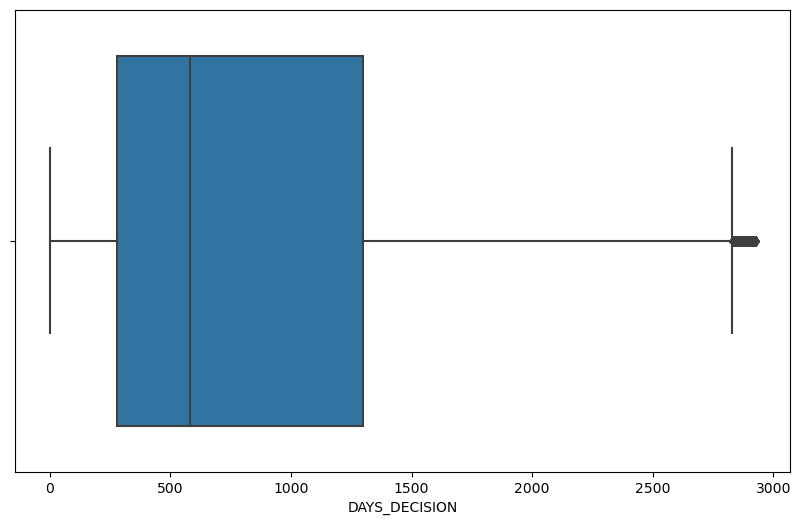

------------------------------------------------------------
99th percentile 65758.5
count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


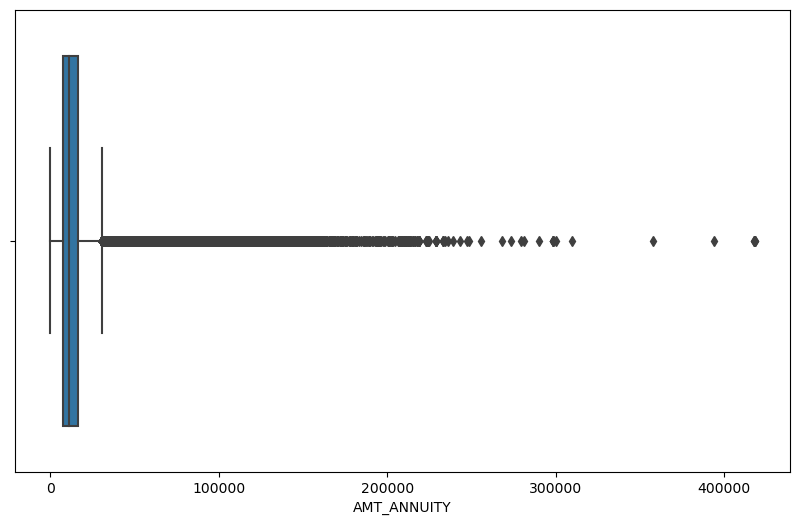

------------------------------------------------------------
99th percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


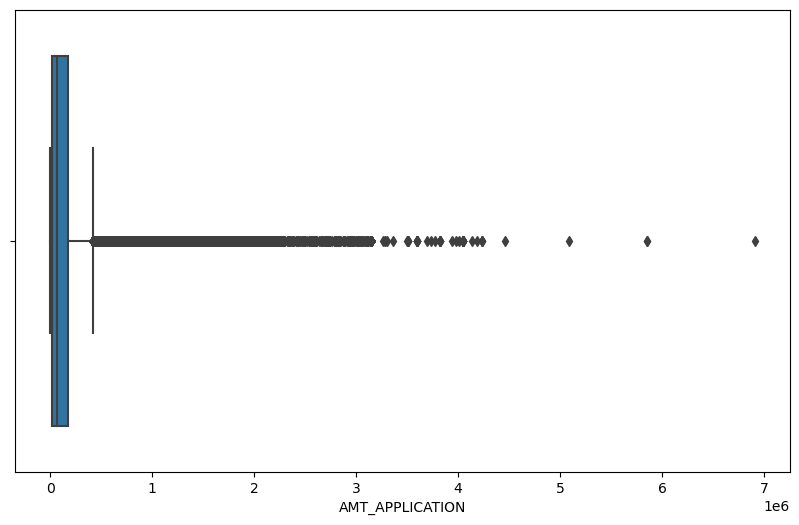

------------------------------------------------------------
99th percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


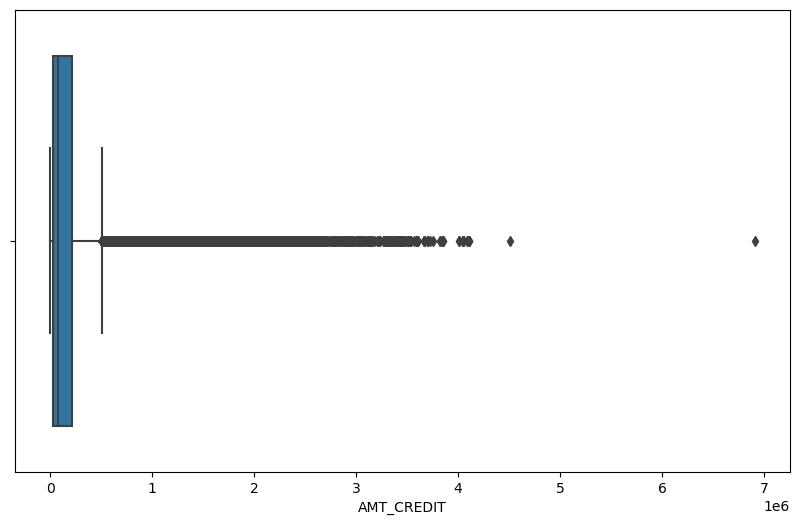

------------------------------------------------------------
99th percentile 1350000.0
count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


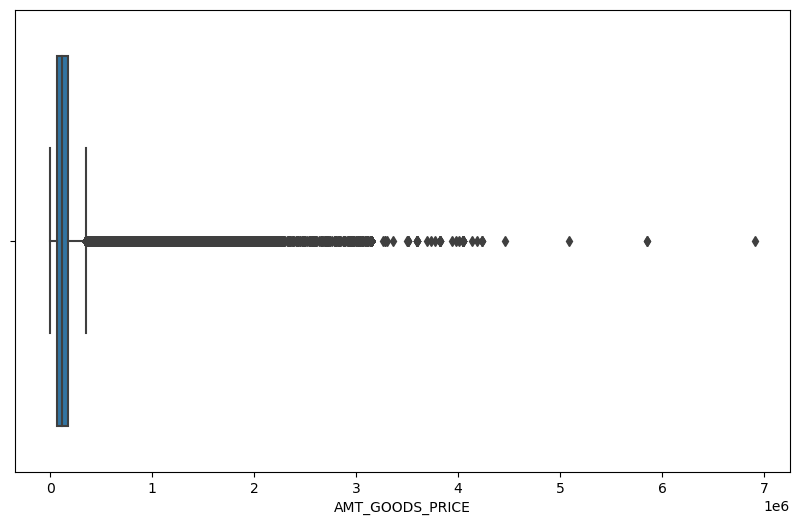

------------------------------------------------------------


In [104]:
for col in num_col:
    print("99th percentile",np.percentile(p_df[col],99))
    print(p_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data = p_df, x= col)
    plt.show()
    print("------------------------------------------------------------")

• Conclusion >> Few Columns are with outliers are below

1. HOUR APPR_PROCESS START has few outliers and there small difference between mean and median
2. AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant vanation in mean and median due to outliers

4. AMT GOODS PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant vanation in mean and median due to outliers

5. AMT APPLICATION Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

6. CNT PAYMENT Column has few outliers and there small difference between mean and median

7. DAYS DECISION has few outliers and there small difference between mean and median

## Bivariate and Multivariate Analysis:

#### Bivariate analysis between WEEKDAY_APPR_PROCESS_START vs AMT_APPLICATION:

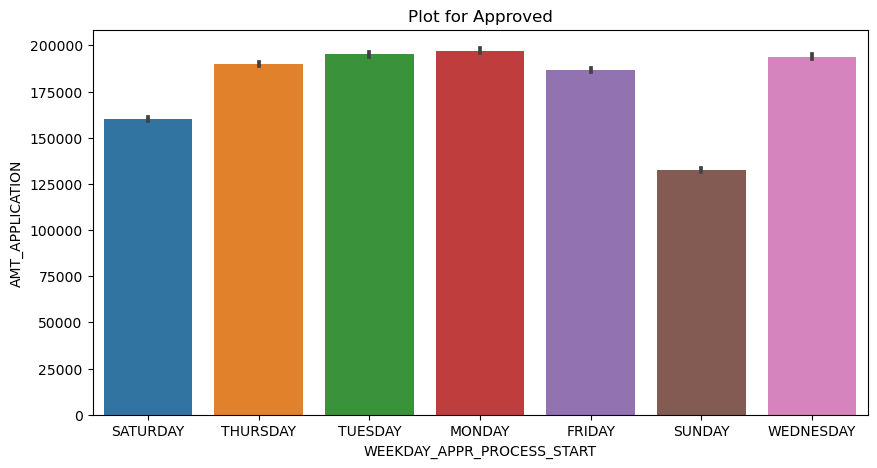

In [105]:
plt.figure(figsize=[10,5])
sns.barplot(x= "WEEKDAY_APPR_PROCESS_START", y = "AMT_APPLICATION", data = approved)
plt.title("Plot for Approved")
plt.show()

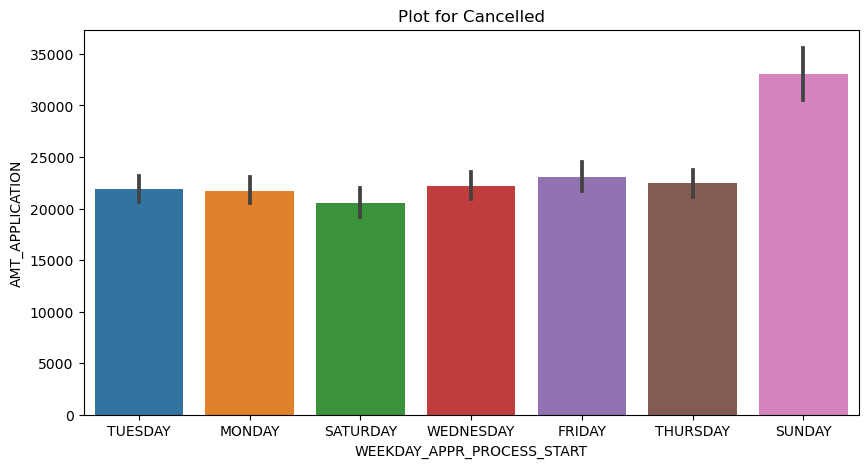

In [111]:
plt.figure(figsize=[10,5])
sns.barplot(x= "WEEKDAY_APPR_PROCESS_START", y = "AMT_APPLICATION", data = cancelled)
plt.title("Plot for Cancelled")
plt.show()

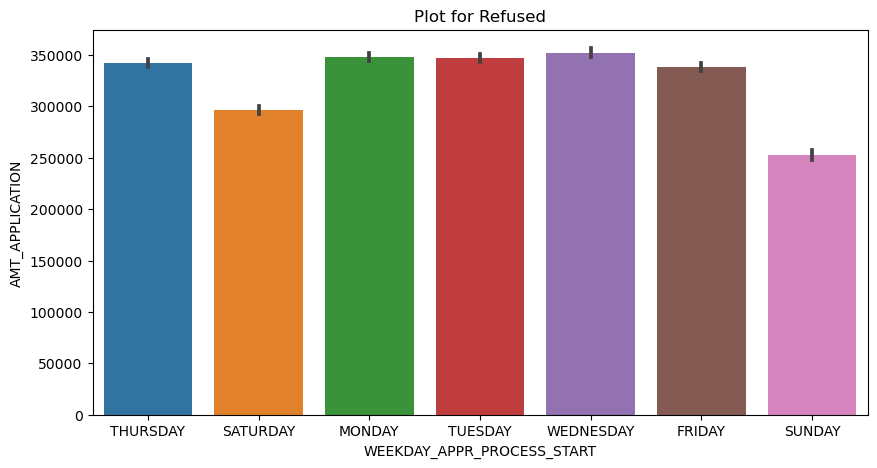

In [112]:
plt.figure(figsize=[10,5])
sns.barplot(x= "WEEKDAY_APPR_PROCESS_START", y = "AMT_APPLICATION", data = refused)
plt.title("Plot for Refused")
plt.show()

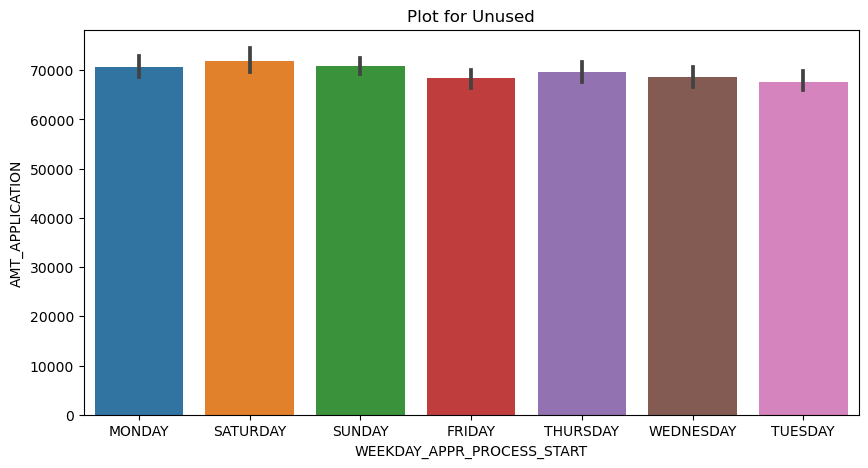

In [113]:
plt.figure(figsize=[10,5])
sns.barplot(x= "WEEKDAY_APPR_PROCESS_START", y = "AMT_APPLICATION", data = unused)
plt.title("Plot for Unused")
plt.show()

﻿ Conclusion >>
1. The Credit Amount of applicants with approved status is high on Monday and Wednesday than other days, and least on Sunday
2 The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days
3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday
4. The Credit Amount of applicants with unused offer status is almost equal on all days

#### Bivariate Analysis between AMT_ANNUITY vs AMT_GOODS_PRICE:

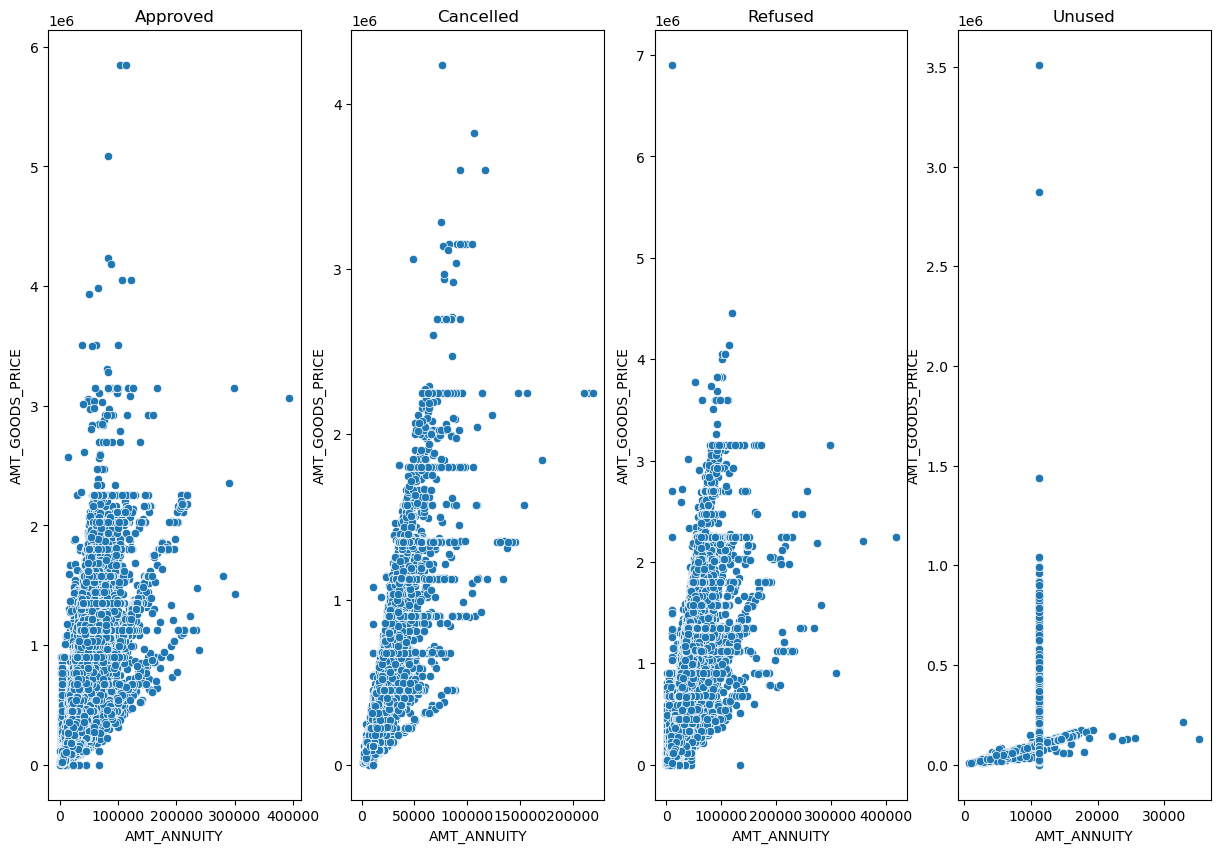

In [121]:
plt.figure(figsize=(15,10)) 
plt.subplot(1,4,1) 
plt.title("Approved")
sns.scatterplot(x= "AMT_ANNUITY" ,y="AMT_GOODS_PRICE", data=approved) 
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x="AMT_ANNUITY", y="AMT_GOODS_PRICE", data=cancelled) 
plt.subplot (1,4,3) 
plt.title("Refused")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE", data = refused) 
plt.subplot (1,4,4) 
plt.title("Unused")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE", data=unused)
plt.show()

﻿ Conclusion >>
1. For loan status as Approved, Refused, Cancelled Amount of annuity increases with goods price 
2. For loan status as Refused it has no linear relationship

#### Correlation between Numerical columns:

In [123]:
corr_approved = approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_refused = refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_cancelled = cancelled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]] 
corr_unused = unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]

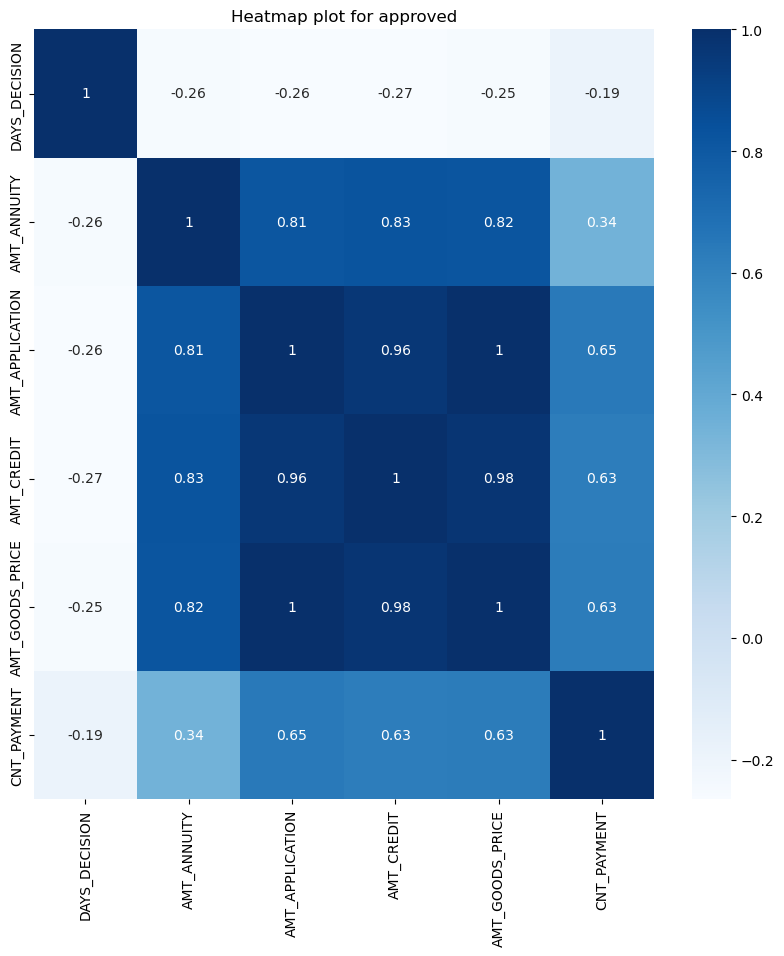

In [124]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved.corr(),annot = True, cmap='Blues')
plt.title('Heatmap plot for approved')
plt.show()

﻿ Conclusion >>
1. AMT APPLICATION has higher Corelation with AMT CREDIT and AMT GOODS PRICE,  AMT ANNUITY
2. DAYS DECISION has negative Corelation with AMT GOODS PRICE AMT CREDIT, AMT APPLICATION, CNT_PAYMENT, AMT_ANNUITY

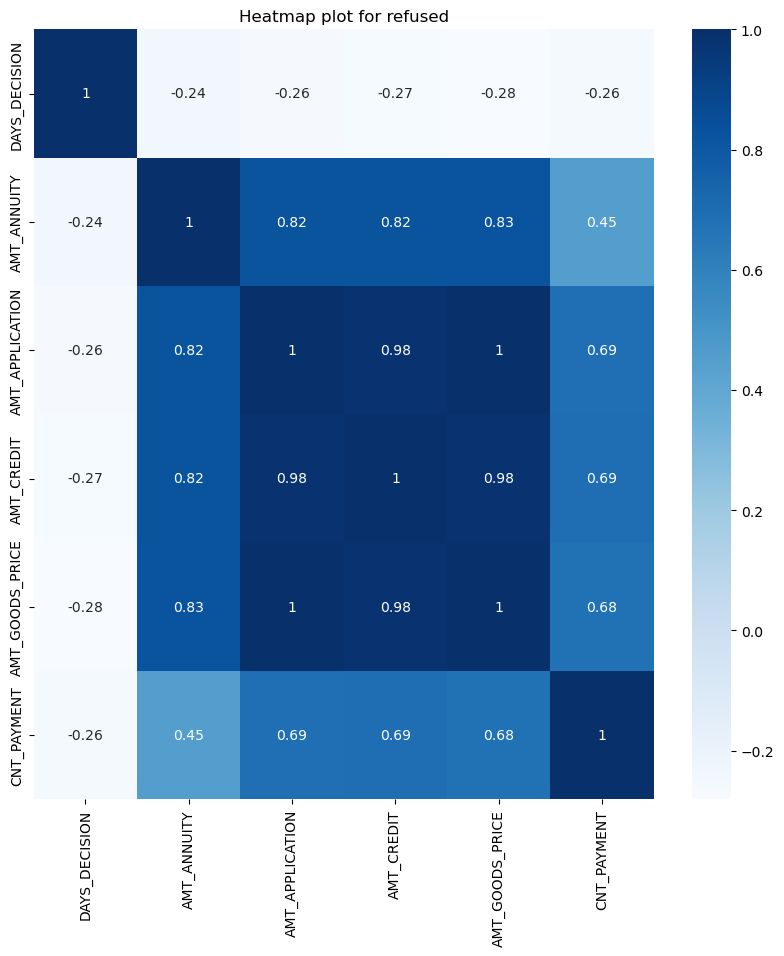

In [125]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused.corr(),annot = True, cmap='Blues')
plt.title('Heatmap plot for refused')
plt.show()

 Conclusion >>

1. AMT APPLICATION has higher Corelation with AMT CREDIT and AMT GOODS PRICE, AMT ANNUITY
2. DAYS DECISION has negative Corelation with AMT GOODS PRICE AMT CREDIT, AMT APPLICATION, CNT_PAYMENT, AMT_ANNUITY


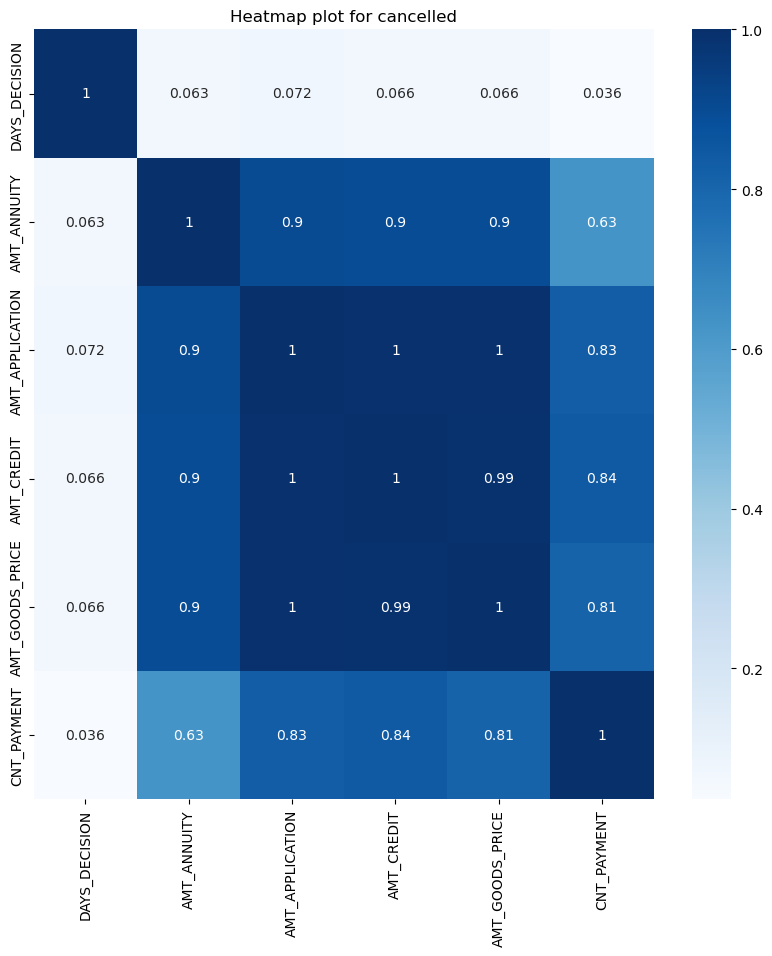

In [126]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_cancelled.corr(),annot = True, cmap='Blues')
plt.title('Heatmap plot for cancelled')
plt.show()

 Conclusion >>

1. AMT APPLICATION has higher Corelation with AMT CREDIT and AMT GOODS PRICE, AMT ANNUITY
2. DAYS DECISION has negative Corelation with AMT GOODS PRICE AMT CREDIT, AMT APPLICATION, CNT_PAYMENT, AMT_ANNUITY



# Merge the application and Previous application dataframes.

In [127]:
merge_df = df.merge(p_df ,on = ["SK_ID_CURR"], how = "left")
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [128]:
merge_df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.000000
AMT_GOODS_PRICE_x                0.000000
NAME_TYPE_SUITE                  0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [129]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 114 entries, SK_ID_CURR to AMT_GOODS_PRICE_normalized
dtypes: category(4), float64(37), int32(5), int64(41), object(27)
memory usage: 1.2+ GB


## filtering required columns for analysis:

In [131]:
for col in merge_df:
    if col.startswith('FLAG'):
        merge_df.drop(columns = col, axis = 1, inplace = True)

In [132]:
merge_df.shape

(1430155, 85)

In [135]:
res1 = pd.pivot_table(data=merge_df, index=["NAME_INCOME_TYPE", "NAME_CLIENT_TYPE"], 
                      columns=['NAME_CONTRACT_STATUS'], values="TARGET", aggfunc="mean")
res1              

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

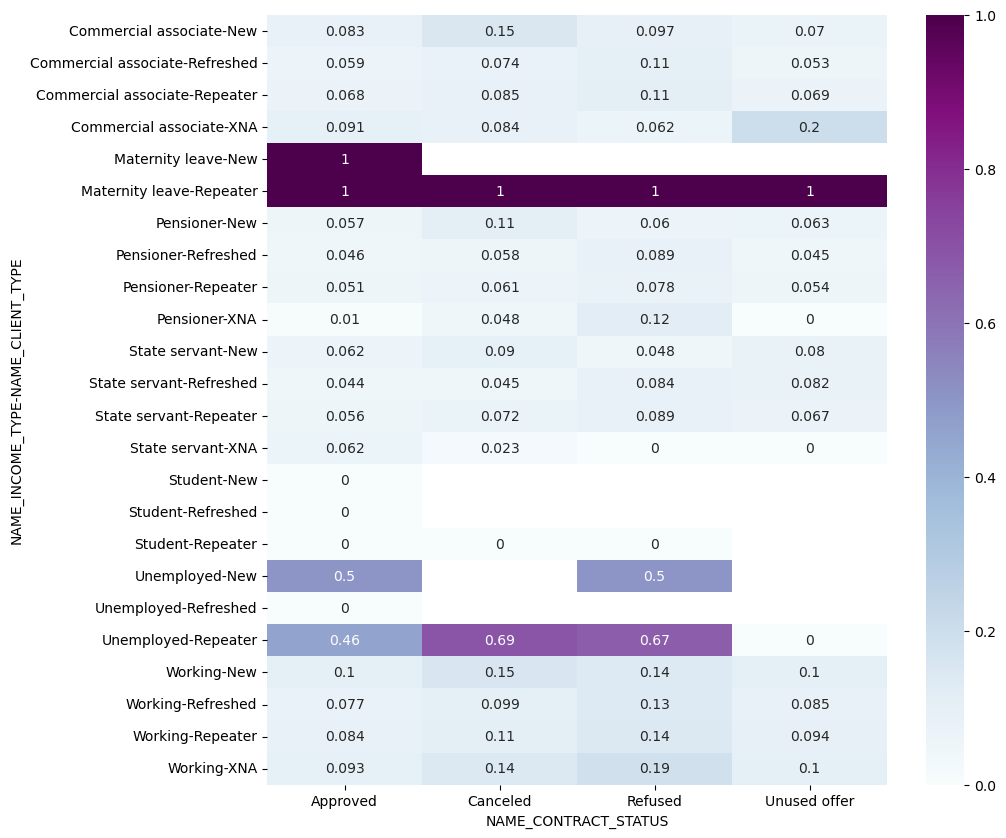

In [137]:
plt.figure(figsize=[10,10])
sns.heatmap(res1,annot=True,cmap="BuPu")
plt.show()

• Conclusion >>
1. Applicants with income type Maternity leave and client type New are having more chances of getting the loan approved
2. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled
3. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused
4. Applicants with income type Maternity leave and client type Repeater, Working and client type New are not able to utilize the Bank's offer

In [139]:
res2 = pd.pivot_table(data=merge_df, index=["CODE_GENDER", "NAME_SELLER_INDUSTRY"], 
                      columns=['TARGET'], values="AMT_GOODS_PRICE_x", aggfunc="sum")
res2    

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

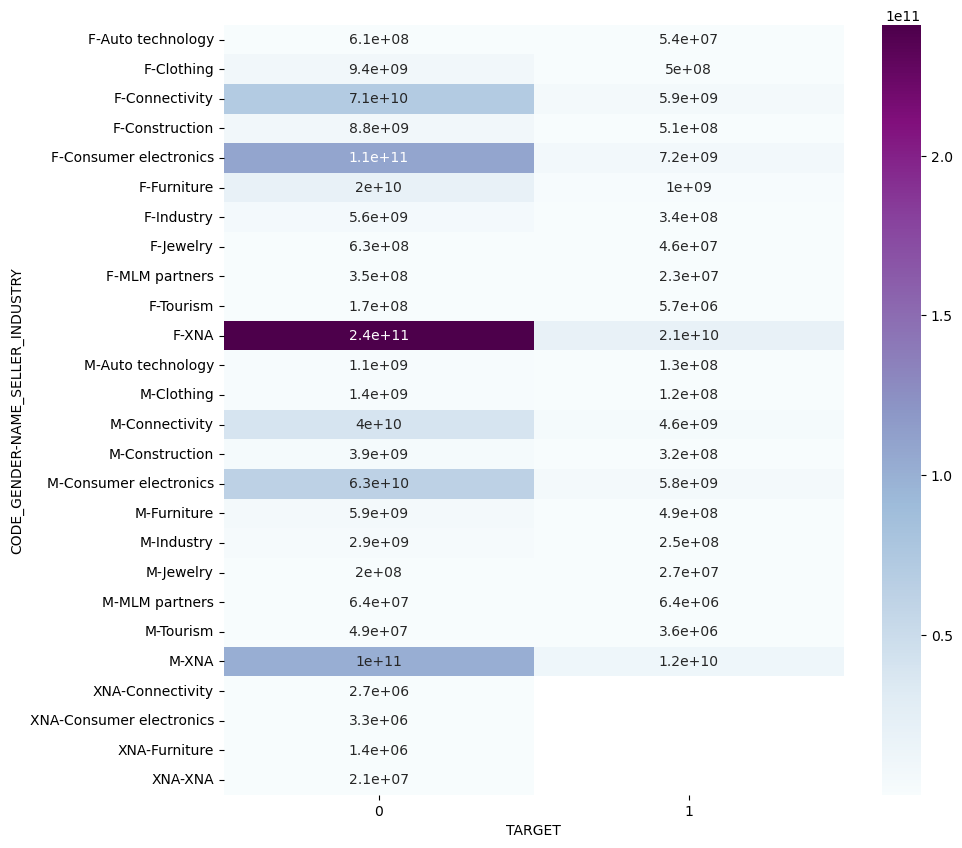

In [140]:
plt.figure(figsize=[10,10])
sns.heatmap(res2,annot=True,cmap="BuPu")
plt.show()